# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### <a name="0.0"></a> Оглавление
* [0. Описание данных и задачи](#0.)
* [1. Изучение общей информации](#1.)
* [2. Предобработка данных](#2.)
    - [2.1. Работа с пропусками](#2.1.)
        - [2.1.1. Обработка общей площади](#2.1.1.)
        - [2.1.2. Пропуски, жилая площадь](#2.1.2.)
        - [2.1.3. Пропуски, площадь кухни](#2.1.3.)
        - [2.1.4. Пропуски, количество этажей](#2.1.4.)
        - [2.1.5. Пропуски, балконы](#2.1.5.)
        - [2.1.6. Пропуски, высота потолка](#2.1.6.)
        - [2.1.7. Пропуски, аппартаменты](#2.1.7.)
    - [2.2. Изменение типа данных](#2.2.)
* [3. Рассчеты и добавление столбцов](#3.)
    - [3.1. Расчет цены квадратного метра](#3.1.)
    - [3.2. Расчет дня недели, месяца и года публикации](#3.2.)
    - [3.3. Расчет этажа](#3.3.)
    - [3.4. Расчет соотношения жилой к общей площади](#3.4.)
    - [3.5. Расчет соотношения площади кухни к общей](#3.5.)
* [4. Анализ данных](#4.)
    - [4.1. Изучение параметров площади, цены, количества комнат, высоты потолков](#4.1.)
        - [4.1.1. Гистограмма общей площади](#4.1.1.)
        - [4.1.2. Гистограмма цены квартиры](#4.1.2.)
        - [4.1.3. Гистограмма количества комнат](#4.1.3.)
        - [4.1.4. Гистограмма высоты потолков](#4.1.4.)
    - [4.2. Изучение времени продажи](#4.2.)
        - [4.2.1. Быстрые и медленные продажи](#4.2.1.)
    - [4.3. Чистка редких и выбивающихся значений](#4.3.)
    - [4.4. Влияние факторов на стоимость квартиры](#4.4.)
        - [4.4.1. Зависимость цены от м2](#4.4.1.)
        - [4.4.2. Зависимость цены от числа комнат](#4.4.2.)
        - [4.4.3. Зависимость цены от расстояния от центра](#4.4.3.)
        - [4.4.4. Зависимость цены от этажа](#4.4.4.)
        - [4.4.5. Зависимость цены от даты размещения объявления](#4.4.5.)
    - [4.5. Топ 10 населенных пунктов по кол-ву объявлений](#4.5.)
    - [4.6. Изучение предложения квартир](#4.6.)
    - [4.7. Выделение сегмента квартир в центре Питера](#4.7.)
        - [4.7.1. Анализ центра Питера по 4 параметрам](#4.7.1.)
        - [4.7.2. Зависимость цены от этажа в центре](#4.7.2.)
        - [4.7.3. Зависимость цены от даты публикации квартиры в центре](#4.7.3.)
    - [4.8. Матрица корреляции цены](#4.8.)
* [5. Общий вывод](#5.)

### <a name="0."></a> Описание данных и задачи
<font>[к Оглавлению](#0.0)</font>

Описание данных

* <b>airports_nearest</b>  — расстояние до ближайшего аэропорта в метрах (м)
* <b>balcony</b> — число балконов
* <b>ceiling_height</b> — высота потолков (м)
* <b>cityCenters_nearest</b> — расстояние до центра города (м)
* <b>days_exposition</b> — сколько дней было размещено объявление (от публикации до снятия)
* <b>first_day_exposition</b> — дата публикации
* <b>floor</b> — этаж
* <b>floors_total</b> — всего этажей в доме
* <b>is_apartment</b> — апартаменты (булев тип)
* <b>kitchen_area</b> — площадь кухни в квадратных метрах (м²)
* <b>last_price</b> — цена на момент снятия с публикации
* <b>living_area</b> — жилая площадь в квадратных метрах(м²)
* <b>locality_name</b> — название населённого пункта
* <b>open_plan</b> — свободная планировка (булев тип)
* <b>parks_around3000</b> — число парков в радиусе 3 км
* <b>parks_nearest</b> — расстояние до ближайшего парка (м)
* <b>ponds_around300</b>0 — число водоёмов в радиусе 3 км
* <b>ponds_nearest</b> — расстояние до ближайшего водоёма (м)
* <b>rooms</b> — число комнат
* <b>studio</b> — квартира-студия (булев тип)
* <b>total_area</b> — площадь квартиры в квадратных метрах (м²)
* <b>total_images</b> — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### Задачи

#### 1. Предобратотка данных
* определить и изучить пропущенные значения;
* заполнить пропуски, где это уместно;
* указать причины, которые могли привести к пропускам в данных;
* привести данные к нужным типам;

#### 2. Добавить в таблицу
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

#### 3. Анализ данных
* Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
* Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
* Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружили.
* Какие факторы больше всего влияют на стоимость квартиры? 
* Изучить, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. 
* Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
* Изучить зависимость от даты размещения: дня недели, месяца и года.
* Выбрать 10 населённых пунктов с наибольшим числом объявлений. 
* Посчитать среднюю цену квадратного метра в этих населённых пунктах. 
* Выделить населённые пункты с самой высокой и низкой стоимостью жилья. Столбец 'locality_name'.
* Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
* Выделить квартиры в Санкт-Петербурге ('locality_name'). 
* Выяснить, какая область входит в центр. 
* Создайть столбец с расстоянием до центра в километрах: округлить до целых значений. 
* Посчитать среднюю цену для каждого километра. 
* Построить график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
* Выделить сегмент квартир в центре. 
* Проанализировать эту территорию и изучить параметры: площадь, цена, число комнат, высота потолков. 
* Выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
* Сделайте выводы. Отличаются ли они от общих выводов по всему городу?
    

### <a name="1."></a>Шаг 1. Откроем файл с данными и изучим общую информацию. 
<font>[к Оглавлению](#0.0)</font>

#### Прочитали файл и указали разделитель табуляции. Вывели первые 5 сторок таблицы.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display
import numpy as np
import time

df = pd.read_csv('data.csv', sep="\t")
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Видно много пропусков NaN

#### Рассмотрим названия столбцов

In [2]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Посмотрим общую информацию по датафрейму и всем признакам, воспользуемся методом info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В данных 27000 строк и 22 столбца. Видно большое количество пропусков и данные в которых нужно заменить тип.

#### Посмотрим сколько отсутствует значений по столбцам

In [4]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### <a name="1.01."></a> Посмотрим основные статистические характеристики

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видно, что количество комнат есть равное 0 и 19. Так же высота потолков от 1 метра до 100 метров. Размер кухни от 1,3кв.м до 112 кв.м Надо исправлять.

<font>[Таблица чистой общей площади](#2.1.1)</font>
<font>[к Оглавлению](#0.0)</font>

Посмотрим статистику по нечисловым признакам

In [6]:
df.describe(include=['object', 'bool'])

,first_day_exposition,is_apartment,studio,open_plan,locality_name
count,23699,2775,23699,23699,23650
unique,1491,2,2,2,364
top,2018-02-01T00:00:00,False,False,False,Санкт-Петербург
freq,368,2725,23550,23632,15721


#### Посмотрим количество данных в столбце комнаты

In [7]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Ноль комнат у 197 квартир

#### Посмотрим значения столбца высоты потолков

In [8]:
df['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

Видно,что тут много ошибок. Все числа выше 3,6 метров можно назвать ошибкой, которую нужно исправить.

Посмортим на цену в топ 10 min и  max

In [9]:
df['last_price'].sort_values().tail(10)

8900     190870000.0
5893     230000000.0
13749    240000000.0
16461    245000000.0
22831    289238400.0
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, dtype: float64

Посмотрим на распределение данных по населенным пунктам

In [10]:
df['locality_name'].value_counts()

Санкт-Петербург                                            15721
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
                                                           ...  
поселок станции Лужайка                                        1
деревня Снегирёвка                                             1
посёлок городского типа Рябово                                 1
деревня Шпаньково                                              1
садоводческое некоммерческое товарищество Лесная Поляна        1
Name: locality_name, Length: 364, dtype: int64

Посмотрим на распределение данных по дням в экспозиции

In [11]:
df['first_day_exposition'].value_counts()

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2014-12-18T00:00:00      1
2016-08-24T00:00:00      1
2016-11-13T00:00:00      1
2018-04-29T00:00:00      1
2014-12-23T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

### <a name="1.1."></a> Вывод
<font>[к Оглавлению](#0.0)</font>

В таблице приведены 22 столбца и 23700 строк.

Перевести значения в столбце first_day_exposition в формат даты.

Во многих столбцах наблюдаются пропуски и некорректные данные. 
* В столбцах расстояния до парка и водоема более половины значений отсутствуют. 
* В столбце аппартаменты отсутствуют данные в 21000 случаях. Можно предположить, что отсутствующие данные это квартиры. 
* В столбце комнаты есть 197 квартир в которых не обозначены количество комнат.
* В столбце  высота потолков есть такие значения как высота в 1м и высота в 100м. Их надо исправить.
* В общей площади есть помещения с 12 кв.м. и с 900 кв.м, их надо проверить на соответсвие и правильное заполнение.
* В жилой площади есть квартира 2 кв.м Явно что то не то.
* В площади кухонь есть так же странные данные. Кухня минимальная 1,2 кв.м и 412 кв.м максимальная.
* Надо перевести в int значения такие столбцы как, экспозиция, расстояния до разных мест, балконы, всего этажей.
* Расстояние до мест можно привести к одинаковым размерам в метрах/км.
* Есть несколько отличающихся значений в цене, как в минимальном так и максимальном диапазоне
* Для балконов, этажей и количество дней публикации, необходимо преобразование типов

Отсутствуют данные в таких столбцах как:

* ceiling_height           9195
* floors_total               86
* living_area              1903
* kitchen_area             2278
* balcony                 11519
* days_exposition          3181

## <a name="2."></a> Шаг 2. Предобработка данных
<font>[к Оглавлению](#0.0)</font>

### <a name="2.1."></a> 2.1. Работа с пропусками

#### <a name="2.1.1."></a> Изучим общую площадь квартир
<font>[к Оглавлению](#0.0)</font>

При покупке/продаже первоначальным фактором является площадь квартиры, количество комнат и цена
Посмотрим как распределились квартиры по площади.

(0.0, 900.0)

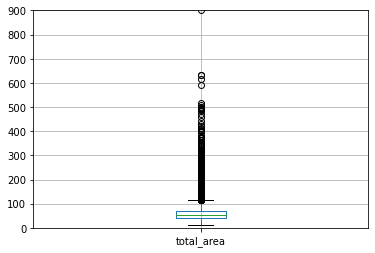

In [12]:
df.boxplot('total_area')
plt.ylim(0, 900)

Сразу видно, что есть большие выбросы боллее 800кв.м, а основные квартиры находятся в диапазоне до 120кв.м
Посмотрим как это выражено в количестве

In [13]:
df['stand_area'] = df['total_area'] < 120
print('Количество квартир до 120 кв.м. -', df['stand_area'].sum())
print('Квартир свыше 120 кв.м. -', df['stand_area'].count() - df['stand_area'].sum(), 'или {:.1%}'.format((df['stand_area'].count() - df['stand_area'].sum()) / len(df['total_area'])))

Количество квартир до 120 кв.м. - 22601
Квартир свыше 120 кв.м. - 1098 или 4.6%


Квартиры, которые более 120 кв.м составляют менее 5% и с ними можно расстаться. Они могут существенно повлиять на цену за кв.м.

In [14]:
df = df.query('total_area < 120').reset_index(drop=True)
df['total_area'].describe()

count    22601.000000
mean        54.757439
std         19.945249
min         12.000000
25%         39.500000
50%         50.400000
75%         66.000000
max        119.800000
Name: total_area, dtype: float64

Из 23700 строк осталось 22601. Оставшегося вполне хватает, чтобы рассчитать необходимые нам данные.

#### <a name="2.1.1"></a> Таблица чистой общей площади
Посмотрим как изменились характеристики после удаления срок в других столбцах

In [15]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22601.000000,2.260100e+04,22601.000000,22601.000000,13754.000000,22519.000000,20817.000000,22601.000000,20427.000000,11691.000000,17098.000000,17117.000000,17118.000000,7370.000000,17118.000000,8396.000000,19707.000000
mean,9.782797,5.369390e+06,54.757439,1.958586,2.749479,10.785692,31.307354,5.916420,9.968755,1.151227,28841.047023,14579.596600,0.582077,494.934600,0.740507,524.897689,175.695590
std,5.612521,3.521553e+06,19.945249,0.907667,1.287681,6.636267,13.803752,4.912649,4.490967,1.057485,12814.180548,8514.813739,0.779258,344.377706,0.917568,277.056968,213.902816
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.381777e+06,39.500000,1.000000,2.500000,5.000000,18.300000,2.000000,7.000000,0.000000,18321.000000,10006.000000,0.000000,289.000000,0.000000,304.000000,44.000000
50%,9.000000,4.500000e+06,50.400000,2.000000,2.640000,9.000000,29.900000,4.000000,9.000000,1.000000,26941.000000,13330.000000,0.000000,458.000000,0.000000,510.000000,93.000000
75%,14.000000,6.329970e+06,66.000000,3.000000,2.780000,16.000000,40.400000,8.000000,11.345000,2.000000,37434.000000,16495.000000,1.000000,616.000000,1.000000,733.000000,223.000000
max,50.000000,8.200000e+07,119.800000,7.000000,100.000000,60.000000,101.000000,33.000000,64.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<font>[к 'грязной' таблице](#1.01.)</font>

Комнаты сократились с 19 до 7,  max жилая площадь с 409 - 101кв.м, кухня с 112 - 64кв.м. Так же изменилась max цена. 
Все удаленные строки имели расстояние до нужных нам мест. Посмотрим помешало ли это нам.
В целом площади более менее соответсвуют действительности, осталось заполнить пропуски по кухне и жилой площади. 

#### <a name="2.1.2."></a>  2.1.2. Заполним пропуски в жилой площади
<font>[к Оглавлению](#0.0)</font>

Посмотрим сколько всего пропусков в жилой площади и выведем строки с отсутствующими данными

In [16]:
print('Пропусков', df['living_area'].isnull().sum())

Пропусков 1784


Выберем строки, в которых отсутствуют значения о жилой площади.

In [17]:
df_living = df.query('living_area.isnull()')[['total_area', 'living_area', 'rooms', 'last_price']]
df_living.head()

,total_area,living_area,rooms,last_price
6,71.6,NaN,2,7915000.0
28,32.8,NaN,1,2200000.0
34,45.8,NaN,2,1990000.0
40,40.0,NaN,1,5350000.0
53,46.5,NaN,1,6300000.0


Посмотрим, в каких квартирах нет значений и сколько их.

In [18]:
df_living['rooms'].value_counts()

1    657
2    637
3    407
4     57
0     13
5     11
7      1
6      1
Name: rooms, dtype: int64

Сделаем подстановку медианных значений жилой площади с других заполненных данный. Критерием будет количество комнат и общая площадь. Высчитаем соотношение жилой площади к общей площади, из имеющихся данных и сгруппируем по количеству квартир. 

Посчитаем соотношение общей площади к жилой из известных данных, медианой, а потом подставим в пропущенные значения полученное соотношение и получим нужную нам жилую площадь.

In [20]:
df_coeff_liv =  round(df["living_area"] / df.groupby('rooms')["total_area"].transform('median'),2)
df.loc[df['living_area'].isnull(), 'living_area'] = (
    df.loc[df['living_area'].isnull()].apply(lambda x: x['total_area'] * df_coeff_liv[x['rooms']], axis = 1))
#%timeit magic

Проверим, что данные правильно посчитаны и напечатаем две строки, которые ранее были без значений.

In [21]:
print('Жилая площадь', df['living_area'].loc[6])
print('Жилая площадь', df['living_area'].loc[28])
print('Жилая площадь', df['living_area'].loc[29])

Жилая площадь 46.54
Жилая площадь 16.727999999999998
Жилая площадь 38.1


In [22]:
df['living_area'].describe()

count    22600.000000
mean        31.348012
std         13.714418
min          2.000000
25%         18.500000
50%         30.000000
75%         40.300000
max        101.000000
Name: living_area, dtype: float64

Значения подставлены, количество строк соответсвует количеству строк в датафрейме и пропусков нет.

#### <a name="2.1.3."></a> 2.1.3. Заполним пропуски в столбце площадь кухни
<font>[к Оглавлению](#0.0)</font>

Посмотрим сколько всего пропусков в площади кухонь и выведем строки с отсутствующими данными

In [23]:
print('Пропусков', df['kitchen_area'].isnull().sum())

Пропусков 2174


In [24]:
df_kitchen = df.query('kitchen_area.isnull()')[['total_area', 'living_area', 'rooms', 'kitchen_area', 'studio']]
df_kitchen.head(10)

,total_area,living_area,rooms,kitchen_area,studio
28,32.8,16.728,1,NaN,False
34,45.8,29.770,2,NaN,False
40,40.0,20.400,1,NaN,False
53,46.5,23.715,1,NaN,False
54,35.0,17.850,1,NaN,False
75,68.0,34.680,1,NaN,False
76,80.5,48.300,3,NaN,False
124,31.0,15.810,1,NaN,False
135,27.0,15.500,0,NaN,True
153,40.3,26.195,2,NaN,False


Посмотрим, в каких квартирах нет значений и сколько их.

In [25]:
df_kitchen['rooms'].value_counts()

1    833
2    649
3    405
0    196
4     70
5     18
6      2
7      1
Name: rooms, dtype: int64

Сделаем подстановку медианных значений площади кухни с других заполненных данный. Критерием будет количество комнат и общая площадь. Высчитаем соотношение кухни к общей площади из имеющихся данных и сгруппируем по количеству квартир. 

In [26]:
df['area_ratio_kitchen'] = df['kitchen_area'] / df['total_area']
round(df.groupby(['rooms']).agg({'area_ratio_kitchen' : 'mean'}),2)

,area_ratio_kitchen
rooms,
0,NaN
1,0.25
2,0.17
3,0.14
4,0.12
5,0.11
6,0.11
7,NaN


Видно явное различие 1кк  к другим данным. Скорей всего в эти данные попали апартаменты и студии. Проверим количество 1кк студий.

In [27]:
df.query('rooms == 1 and studio == True')[['total_area', 'living_area', 'rooms', 'kitchen_area', 'studio', 'is_apartment']]

,total_area,living_area,rooms,kitchen_area,studio,is_apartment
2255,25.41,17.08,1,NaN,True,False
3018,27.00,18.00,1,NaN,True,False
3966,34.00,21.00,1,NaN,True,False
8280,32.50,29.90,1,NaN,True,False
10511,28.00,19.00,1,NaN,True,False
12329,31.00,22.30,1,NaN,True,False
14436,30.00,26.00,1,NaN,True,False
17871,22.00,15.00,1,NaN,True,NaN
19158,22.00,10.94,1,NaN,True,False
20699,23.40,16.00,1,NaN,True,False


Не подтвердилась наша догадка. В 1кк нет студий с известной площадью кухни. Смотрим тогда, какие квартиры дали такие данные. Возьмем 1кк квартиры с известной кухней более 20кв.м.

In [28]:
df.query('rooms == 1 and kitchen_area > 20')[[
    'total_area', 'living_area', 'rooms', 'kitchen_area', 'studio', 'is_apartment']]

,total_area,living_area,rooms,kitchen_area,studio,is_apartment
114,48.00,14.00,1,23.80,False,NaN
165,52.56,15.36,1,20.91,False,NaN
431,51.60,12.70,1,23.10,False,NaN
484,69.00,13.00,1,50.00,False,NaN
635,43.00,9.00,1,23.00,False,NaN
...,...,...,...,...,...,...
20410,42.00,10.50,1,22.00,False,NaN
20897,46.30,9.80,1,26.00,False,NaN
21067,38.50,11.50,1,22.10,False,NaN
22078,58.00,20.00,1,28.00,False,NaN


Вот и ответ на наш вопрос. 1кк квартир с кухней более 20 кв.м 77 шт и это не студии или апартаменты. Правильней было бы назвать эти квартиры не 1кк, а 2 или 3кк, т.к. там кухня объединена с одной из комнат. Такие цифры могут подпортить нам статистику при дальнейшем анализе. 77 квартир это менее 1% и их можно удалить при подсчете соотношения. Посморим при подсчете будет ли влияние и решим. 

Посморим сколько таких объединений в 2к квартирах

In [29]:
df.query('rooms == 2 and kitchen_area > 20')[[
    'total_area', 'living_area', 'rooms', 'kitchen_area']]

,total_area,living_area,rooms,kitchen_area
3,100.00,32.0000,2,41.00
102,72.30,27.4000,2,23.60
128,85.10,31.5200,2,26.85
358,96.00,20.0000,2,36.00
366,65.00,26.0000,2,25.00
...,...,...,...,...
22105,81.10,33.0000,2,25.00
22112,93.50,64.6000,2,22.70
22294,65.16,24.8600,2,21.74
22419,73.83,31.6500,2,21.55


Да тут их еще больше. 259 квартир с кухней более 20 кв.м. и это 3% от всех 2к квартир. В сумме можем на кухне потерять с 3кк и более, до 5% строк. Решим при анализе этой площади как поступить.

Сохраним в новую переменную всю площадь кухни меннее 20 кв.м. И посмотрим какое соотношение будет там.

In [30]:
df_kitchen_area = df.query('kitchen_area < 20')[['total_area', 'living_area', 'rooms', 'kitchen_area']]
df_kitchen_area['area_ratio_kitchen'] = df_kitchen_area['kitchen_area'] / df_kitchen_area['total_area']
df_kitchen_area_ration = round(df_kitchen_area.groupby(['rooms']).agg({'area_ratio_kitchen' : 'mean'}),2)
df_kitchen_area_ration

,area_ratio_kitchen
rooms,
1,0.25
2,0.17
3,0.13
4,0.11
5,0.11
6,0.11


Моему удивлению нет предела. Отношение в 1кк не изменились, хотя в других квартирах стало немного ниже. Хорошо бы знать какое количество квартир имеет площадь кухни, до 20 кв.м.

In [31]:
print('Количество квартир с кухней менее 20кв.м - ', len(df.query('kitchen_area < 20')))
print('Количество квартир с кухней менее 5кв.м - ', len(df.query('kitchen_area < 5')), 'или 0,5%')
print('Количество квартир с кухней от 5 до 10 кв.м - ', len(df.query('5 <= kitchen_area < 10')), 'или 58%')
print('Количество квартир с кухней от 10 до 15 кв.м - ', len(df.query('10 <= kitchen_area < 15')), 'или 34%')
print('Количество квартир с кухней от 15 до 20 кв.м - ', len(df.query('15 <= kitchen_area < 20')), 'или 7%')

Количество квартир с кухней менее 20кв.м -  19732
Количество квартир с кухней менее 5кв.м -  105 или 0,5%
Количество квартир с кухней от 5 до 10 кв.м -  11558 или 58%
Количество квартир с кухней от 10 до 15 кв.м -  6753 или 34%
Количество квартир с кухней от 15 до 20 кв.м -  1316 или 7%


Кухни до 10 кв.м занимают почти 60%. Применим эти данные для расчета соотношения площади кухни к общей площади. Посчитав соотношение мы получили вместо 0,25 - 0,22. Ну с виду не очень, но в квартире 30кв.м. это целый метр разницы в площади кухни. 7,5 и 6,6кв.м

Переведем значения NaN в 0. Выпоним функцию, по которой будет искаться 0 в площади кухни и кол-во комнат, на основании этого общая площадь будет умножена на соотношение общей площади к кухне менее 10кв.м. 

In [32]:
df['coef_kitc'] = df['kitchen_area']/df['total_area']
df['median_coef_kitc'] = round(df.groupby('rooms')['coef_kitc'].transform('median'),2)
def fill_Living(row):
    if np.isnan(row['kitchen_area']):
        return row['total_area'] * row['median_coef_kitc']
    return row['kitchen_area']

df['kitchen_area'] = df.apply(fill_Living, axis = 1)

Проверим, что данные правильно посчитаны и напечатаем две строки, которые ранее были без значений.

In [34]:
print('Площадь кухни', df['kitchen_area'].loc[28])
print('Площадь кухни', df['kitchen_area'].loc[34])
print('Площадь кухни', df['kitchen_area'].loc[76])


Площадь кухни 8.2
Площадь кухни 7.327999999999999
Площадь кухни 10.465


Посчитав и заполнив данные мы видем, что соотношение 0,22 большое. Получалось, что если сложить кухню и жилую площадь, то в 1кк нет коридора и санузла или на это приходится очень мало места и мы понизили соотношение до 0,20.

Ниже построена гистограмма, которая показывает, что пропущенные значения в 1к квартирах общей площадью от 25 до 43кв.м., а жилая от 15 до 22 кв.м. этим квартирам важно не выйти за сумму кухни и жилой площади.

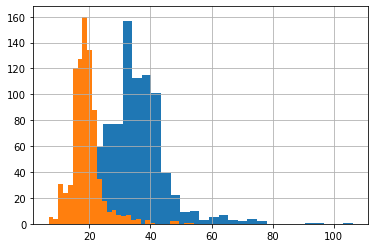

In [35]:
df_kitchen_room = df_kitchen.query('rooms == 1')
df_kitchen_room['total_area'].hist(bins=30)
df_kitchen_room['living_area'].hist(bins=30)
plt.show()

In [36]:
df['kitchen_area'].describe()

count    22404.000000
mean         9.886601
std          4.348620
min          1.300000
25%          7.000000
50%          9.000000
75%         11.100000
max         64.000000
Name: kitchen_area, dtype: float64

Проверили, что получилось и видим, что минимальное значение по площади есть 0кв.м. Выше мы не смогли получить соотношение к квартирам в 0 комнат. Надо понять почему не сработало так же как с жилой площадью, где эта проблема не проявилась и подсчет произошел.

In [37]:
df.query('rooms == 0 and kitchen_area == 0')[['total_area', 'living_area', 'rooms', 'kitchen_area', 'open_plan', 'studio']]

,total_area,living_area,rooms,kitchen_area,open_plan,studio


In [38]:
df.query('rooms == 0 and kitchen_area > 0')[['total_area', 'living_area', 'rooms', 'kitchen_area', 'open_plan']]

,total_area,living_area,rooms,kitchen_area,open_plan


Все квартиры, которые со значением 0 комнат - это 58 Свободной планировки и 138 Студии в сумме 196, как и указано выше, когда смотрели количество пропусков по комнатам.

#### <a name="2.1.4."></a> 2.1.4. Заполним пропуски по количеству этажей в доме
<font>[к Оглавлению](#0.0)</font> 

Посмотрим количество пропусков в floors_total и посмотрим как это выглядит в таблице

In [39]:
print('Пропусков', df['floors_total'].isnull().sum())

Пропусков 82


In [40]:
df_floors = df.query('floors_total.isnull()')[['floors_total', 'rooms', 'floor', 'last_price']]
df_floors.head()

,floors_total,rooms,floor,last_price
173,NaN,2,4,11640000.0
223,NaN,1,1,2438033.0
434,NaN,2,12,9788348.0
628,NaN,3,8,6051191.0
1656,NaN,1,9,3600000.0


Есть предположение, что этажность собственником квартиры могла быть не указна специально, т.к. не хотели показвать последний этаж. Проверим какое количество пропущенных значений по этажам квартир

In [41]:
df_floors['floor'].value_counts()

4     9
6     8
8     8
12    6
9     5
21    4
5     4
7     4
11    3
3     3
10    3
1     3
13    3
15    3
19    3
14    2
18    2
20    2
2     2
24    2
23    1
17    1
22    1
Name: floor, dtype: int64

Заменим максимальные данные по количеству этажей, они мешают просмотру гистограммы, на 6 и 5 этажей, прежполагаем что была опечатка.

In [42]:
df['floors_total'] = df['floors_total'].replace(60, 6)
df['floors_total'] = df['floors_total'].replace(52, 18)

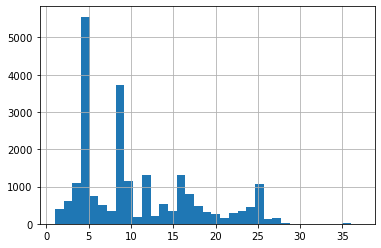

In [43]:
df['floors_total'].hist(bins=35)

Частично предположение похоже на правду. На гистграмме видно, что из всех данных преобладают 5 и 9 этажи как последние, так же есть пики в 12, 16, 25 этажей. По данным пропусков подтверждается предположение для 12 и 9 этажек. 

Переведем NaN в 0 и выполним функцию по замене в столбце 'floors_total' значения 0, на значение столбца этаж + 1, а там где 5, 9 и 12 поставим тот же этаж, что бы он был последним. 

In [44]:
df['floors_total'] = df['floors_total'].fillna(0)
def cat_floor(row):
    
    if row['floors_total'] == 0 and row['floor'] == 5:
        return row['floor']
    elif row['floors_total'] == 0 and row['floor'] == 9:
        return row['floor'] 
    elif row['floors_total'] == 0 and row['floor'] == 12:
        return row['floor'] 
    elif row['floors_total'] == 0:
        return row['floor'] + 1 
    else:
        return row['floors_total']
        
df.loc[:, 'floors_total'] = df.apply(cat_floor, axis=1)

Проверим, что данные записались и выведем строки 173 и 223, которые выше в таблице были без значений.

In [45]:
print('Количество этажей в доме', df['floors_total'].loc[173])
print('Количество этажей в доме', df['floors_total'].loc[223])

Количество этажей в доме 5.0
Количество этажей в доме 2.0


Видим, что данные записались вместо нулей. Проверим как теперь выглядят основные характеристики по столбцу floors_total

In [46]:
df['floors_total'].describe()

count    22601.000000
mean        10.782399
std          6.621244
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

Всю этажность привели в нормальный вид. Можно исследовать.

#### <a name="2.1.5."></a> 2.1.5. Заполним пропуски в столбце балконы
<font>[к Оглавлению](#0.0)</font>

Если в квартире нет балкона, то его и не указыват. Поставим 0 вместо NaN. И приведем в целостный вид.

In [47]:
df['balcony'] = df['balcony'].fillna(0).astype('int')

#### <a name="2.1.6."></a>  2.1.6. Заполним пропуски в столбце высота потолков
<font>[к Оглавлению](#0.0)</font>

In [48]:
print('Пропусков', df['ceiling_height'].isnull().sum())

Пропусков 8847


In [49]:
df_height = df.query('ceiling_height.isnull()')[['total_area', 'floors_total', 'rooms', 'ceiling_height']]
df_height.head()

,total_area,floors_total,rooms,ceiling_height
1,40.4,11.0,1,NaN
2,56.0,5.0,2,NaN
4,30.4,12.0,1,NaN
5,37.3,26.0,1,NaN
6,71.6,24.0,2,NaN


Сгруппируем данные, количество этажей и высота потолков. Посмотрим как изменяется медиана высоты потолков к высоте дома.

In [50]:
round(df.groupby(['floors_total']).agg({'ceiling_height' : 'mean'}),2)

,ceiling_height
floors_total,
1.0,2.74
2.0,3.01
3.0,2.94
4.0,2.96
5.0,2.77
6.0,3.06
7.0,2.88
8.0,2.80
9.0,2.59


Теория, что самые низкие здания в центре и они старые, а в то время потолки делали выше, имеет место быть. До 6 этажа потолки в среднем 3 метра. Из этого выбивается Пятиэтажки, которых большинство по сравнению с остальными, и правильней было бы высоту в Пятиэтажках сделать среднюю. Чем выше здание, тем больше значение стремиться к 2,75 метра.

Заменим пустые значения средним по столбцу Всего этажей в здании

In [51]:
df['ceiling_height'] = df['ceiling_height'].fillna(0)
def cat_height(row):
    
    if (row['ceiling_height'] == 0 and row['floors_total'] < 5):
        return 3
    elif (row['ceiling_height'] == 0 and row['floors_total'] >= 5):
        return 2.75
    else:
        return row['ceiling_height']
        
df.loc[:, 'ceiling_height'] = df.apply(cat_height, axis=1)

Проверим, что данные записались и выведем строки 1 и 2, которые выше в таблице были без значений.

In [52]:
print('Высота потолков в доме', df['ceiling_height'].loc[1])
print('Высота потолков в доме', df['ceiling_height'].loc[2])

Высота потолков в доме 2.75
Высота потолков в доме 2.75


In [53]:
df['ceiling_height'].describe()

count    22601.000000
mean         2.758565
std          1.005575
min          1.000000
25%          2.600000
50%          2.750000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Пропуски заполнены, все данные есть. Выбросы изучим и исправим. 

Посмотрим, какие есть значения меньше 2,5 метра и более 3,5 метра, n/r это распространенные высоты потолков в квартирах.

In [54]:
df.query('ceiling_height < 2.5')['ceiling_height'].value_counts()

2.40    23
2.45    15
2.00    11
2.48     8
2.30     4
2.47     3
2.46     2
2.20     1
1.20     1
2.49     1
2.34     1
1.00     1
2.25     1
1.75     1
Name: ceiling_height, dtype: int64

Видим, что оказывается есть квартиры с высотой и менее 2,5 метра и наверное все, что ниже 2,3 есть ошибкой, опечаткой. Исправим эти значения на средние 2,75 метра

In [55]:
df.query('ceiling_height > 3.5')['ceiling_height'].value_counts()
#plt.show()

4.00      26
3.60      22
3.70      18
3.80      15
3.55      12
27.00      8
3.90       7
4.20       7
25.00      7
3.75       7
4.50       5
3.54       5
3.95       4
3.65       4
4.10       3
8.00       3
3.63       2
4.19       2
3.62       2
3.53       2
32.00      2
3.52       2
3.56       2
3.66       2
22.60      1
27.50      1
3.85       1
5.00       1
5.80       1
8.30       1
5.30       1
4.30       1
3.88       1
24.00      1
26.00      1
14.00      1
4.37       1
4.25       1
20.00      1
100.00     1
3.93       1
4.80       1
3.68       1
3.57       1
3.84       1
3.67       1
3.83       1
3.98       1
4.14       1
3.78       1
4.15       1
10.30      1
4.06       1
3.59       1
4.70       1
Name: ceiling_height, dtype: int64

Видим, что есть квартиры до 4 метров. Остальные данные так же ошибки и есть показательные опечатки, 25, 27, 32... метра. Явно не проставлена точка между цифрами 2.5, 2.7, 3.2 метра. Эти данные желательно так же привести в порядок.

In [56]:
def cat_height(row):
    
    if (row['ceiling_height'] < 2.3):
        return 2.75
    elif (row['ceiling_height'] == 27):
        return 2.7
    elif (row['ceiling_height'] == 25):
        return 2.5
    elif (row['ceiling_height'] == 32):
        return 3.2
    elif (row['ceiling_height'] > 4):
        return 2.75
    else:
        return row['ceiling_height']
        
df.loc[:, 'ceiling_height'] = df.apply(cat_height, axis=1)

In [57]:
df['ceiling_height'].describe()

count    22601.00000
mean         2.72821
std          0.19024
min          2.30000
25%          2.60000
50%          2.75000
75%          2.75000
max          4.00000
Name: ceiling_height, dtype: float64

Теперь все данные в порядке, можно исследовать

#### <a name="2.1.7."></a> 2.1.7. Заполним все пропуски в аппартаментах
<font>[к Оглавлению](#0.0)</font>

Заполним все пропуски в аппартаментах на False. В столбце аппартаменты  2775 значений из них только 50 True, можем предположить, что все остальные знаxения будут отнесены к квартирам, и замена будет разумная.

In [58]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].count()

22601

#### Проверим наличие дубликатов после замены пропусков

In [59]:
df.duplicated().sum()

0

#### Вывод:

При заполнении пропусков по площадям, мы решили сразу подкорректировать выбросы и убрали данные которые в дальнейшем будут нам мешать, путать делать правильные выводы.

Пропуски в площадях довольно легко можно объяснить. 

Жилая и кухни. При продаже квартиры у собственника есть два документа в которых указаны размеры его квартиры. Первый документ о регистрайии и второй технический план. Первый обязательный документ и в нем указана только общая площадь, а второй не обязательный и его часто теряют. Поэтому в данных везде есть общая площадь и нет жилой и кухни. Собственнику просто негде их взять, а мерить он не будет. И как показали данные, пропуски часто сразу по двум позициям в одной квартире.

Так же при заполнении мы обнаружили, что есть 58 квартир свободной планировки и 138 студий, в которых жилая и кухня объединены. Поэтому там ставиться 0 по кухне. Ноль, скорей всего, ставиться программой, когда указываешь тип квартиры.

Пропуски по высоте потолка по томуже принципу сделаны, собственник квартиры просто не знает величену.

Пропуски в количестве этажей в доме сложней объяснить с точки зрения документов, ведь каждый собственик знает этажность своего дома. Возможно не увидели поле для заполнения и тогда надо указать разработчикам на это или не захотели, а этот пункт явно не обязательный. Более точно можно понять, взяв строки, в которых были пропуски количества этажей и сравнить, были ли пропуски в этих строках еще и по площадям. Если да, то можно предположить о том, что данные проигнорированы осознано, если нет, то возможно не видно поле заполнения этажности.

Пока не трогали данные о расстоянии, наименовании населенных пунктов и количестве водоемов и парков, потому , что не понятно какие данны понадобятся., а какие нет. В процессе анализа нужные пропуски заменим или удалим.

### <a name="2.2."></a> 2.2. Изменение типа данных
<font>[к Оглавлению](#0.0)</font>

Смотрим какие данные у нас есть и в каком типе они записаны

In [60]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22601 entries, 0 to 22600
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22601 non-null  int64  
 1   last_price            22601 non-null  float64
 2   total_area            22601 non-null  float64
 3   first_day_exposition  22601 non-null  object 
 4   rooms                 22601 non-null  int64  
 5   ceiling_height        22601 non-null  float64
 6   floors_total          22601 non-null  float64
 7   living_area           22600 non-null  float64
 8   floor                 22601 non-null  int64  
 9   is_apartment          22601 non-null  bool   
 10  studio                22601 non-null  bool   
 11  open_plan             22601 non-null  bool   
 12  kitchen_area          22404 non-null  float64
 13  balcony               22601 non-null  int32  
 14  locality_name         22555 non-null  object 
 15  airports_nearest   

Видим, что цену, количество этажей и дней в экспозиции нужно перевести в целочисленный тип. Копейки в миллионах нам ни к чему. Этажи с нулями, тоже не нужны и дни в рекламе меряются целыми днями.
Datetime применить к дате.

#### Приведем дату к нужному виду
Переводим значения в столбце 'first_day_exposition' формат даты методом to_datetime(). Убираем значение врмении оставляем только дату.

In [61]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d')

Добавим новый столбец в котором расстояние до центра будет выражено в целом виде и в км.

In [62]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000

#### Приведем данные к нужным типам

In [64]:
for column in ['last_price', 'floors_total']:
    df[column] = df[column].astype('int')

In [65]:
to_Int64 = ['days_exposition', 'airports_nearest', 'cityCenters_nearest_km', 'parks_around3000',
   'parks_nearest', 'ponds_around3000', 'ponds_nearest']

In [66]:
for column in to_Int64:
    df[column] = df[column].round().astype('Int64')
    

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22601 entries, 0 to 22600
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22601 non-null  int64         
 1   last_price              22601 non-null  int32         
 2   total_area              22601 non-null  float64       
 3   first_day_exposition    22601 non-null  datetime64[ns]
 4   rooms                   22601 non-null  int64         
 5   ceiling_height          22601 non-null  float64       
 6   floors_total            22601 non-null  int32         
 7   living_area             22600 non-null  float64       
 8   floor                   22601 non-null  int64         
 9   is_apartment            22601 non-null  bool          
 10  studio                  22601 non-null  bool          
 11  open_plan               22601 non-null  bool          
 12  kitchen_area            22404 non-null  float6

Столбец last_price приведем к тысячам, а то слишком много нулей и отображение на графиках не удобное. Проверим столбец цены на квартиры.

In [68]:
df['last_price'].describe().apply(lambda x: format(x, 'f'))

count       22601.000000
mean      5369389.819212
std       3521553.493541
min         12190.000000
25%       3381777.000000
50%       4500000.000000
75%       6329970.000000
max      82000000.000000
Name: last_price, dtype: object

In [69]:
df.sort_values('last_price', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,stand_area,area_ratio_kitchen,coef_kitc,median_coef_kitc,cityCenters_nearest_km
6153,2,82000000,114.0,2015-12-17,3,2.75,5,78.5,4,False,...,2,218,3,69,651,True,0.175439,0.175439,0.13,3
9547,3,53000000,90.0,2019-03-21,3,3.15,5,73.0,3,False,...,3,389,3,564,40,True,0.133333,0.133333,0.13,2
7363,20,50000000,93.0,2019-04-18,2,2.75,7,40.0,4,False,...,2,160,3,569,<NA>,True,0.301075,0.301075,0.16,0
9537,9,49500000,119.0,2016-01-19,3,3.30,8,47.0,2,False,...,3,134,0,<NA>,425,True,0.420168,0.420168,0.13,5
6805,0,48000000,108.0,2018-02-01,3,2.75,5,61.0,2,False,...,1,551,3,415,144,True,0.125000,0.125000,0.13,3
10950,1,46424072,92.4,2014-12-09,2,2.75,6,54.8,6,True,...,2,160,3,569,1030,True,0.216450,0.216450,0.16,0
5042,19,45000000,96.0,2018-11-15,2,3.20,6,62.4,4,True,...,2,160,3,569,<NA>,True,0.468750,0.468750,0.16,0
7244,18,40000000,110.0,2018-02-19,3,3.20,4,74.4,2,False,...,2,339,1,93,<NA>,True,0.109091,0.109091,0.13,2
5839,13,40000000,65.3,2017-07-13,2,2.75,5,45.0,2,False,...,1,473,1,283,497,True,0.183767,0.183767,0.16,2
12311,6,39990000,67.7,2015-06-25,3,3.10,7,42.9,6,False,...,1,72,3,202,<NA>,True,0.132939,0.132939,0.13,2


Видим выбросы в стоимости за квартиры и ограничим наши данные 40млн. 7 строк не сильно изменят анализ.

In [70]:
df = df.query('last_price < 40000000').reset_index(drop=True)

In [71]:
df['last_price'].describe().apply(lambda x: format(x, 'f'))

count       22592.000000
mean      5351436.580737
std       3397126.042882
min         12190.000000
25%       3380000.000000
50%       4500000.000000
75%       6320000.000000
max      39990000.000000
Name: last_price, dtype: object

In [72]:
df['last_price'] = (df[df['last_price'].notnull()]['last_price']/1000*1.0).round().astype(int)

In [73]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,stand_area,area_ratio_kitchen,coef_kitc,median_coef_kitc,cityCenters_nearest_km
0,20,13000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482,2,755,<NA>,True,0.231481,0.231481,0.13,16
1,7,3350,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,0,<NA>,0,<NA>,81,True,0.272277,0.272277,0.25,19
2,10,5196,56.0,2015-08-20,2,2.75,5,34.3,4,False,...,1,90,2,574,558,True,0.148214,0.148214,0.16,14
3,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112,1,48,121,True,0.410000,0.410000,0.16,8
4,10,2890,30.4,2018-09-10,1,2.75,12,14.4,5,False,...,<NA>,<NA>,<NA>,<NA>,55,True,0.299342,0.299342,0.25,<NA>


Много данных flot было в таблице. Мы перевели их в int и Int64. Нам не нужны цифры после запятой в расстояних, этажах, днях экспозиции. Так же перевели стоимость квартиры из миллионов в тысячи, более читабельно и места больше свободного.

## <a name="3."></a>Шаг 3. Посчитаем и добавим в таблицу новые данные
<font>[к Оглавлению](#0.0)</font>

### <a name="3.1."></a> 3.1. Расчет цены квадратного метра
<font>[к Оглавлению](#0.0)</font>

In [74]:
df['price_m2'] = df['last_price'] / df['total_area']

### <a name="3.2."></a> 3.2. Расчет дня недели, месяца и года публикации
<font>[к Оглавлению](#0.0)</font>

Заменим дату на число и добавим в таблицу, тоже проделаем с месяцем.

In [75]:
# df['week_exp'] = df['first_day_exposition'].dt.dayofweek
df['month_exp'] = df['first_day_exposition'].dt.month
df['year_exp'] = df['first_day_exposition'].dt.year


Поставим вместо цифр название дней и применим результат. 

In [76]:
#weekdays = {1: '1. Понедельник', 2: '2. Вторник', 3: '3. Среда', 4: '4. Четверг', 
#                    5: '5. Пятница', 6: '6. Суббота', 0: '7. Воскресенье'}
#df['week_exp'] = df['week_exp'].map(weekdays)

In [77]:
df['week_exp'] = df['first_day_exposition'].dt.day_name()
df['week_exp'].head()

0    Thursday
1     Tuesday
2    Thursday
3     Tuesday
4      Monday
Name: week_exp, dtype: object

### <a name="3.3."></a> 3.3. Расчет этажа
<font>[к Оглавлению](#0.0)</font>

Применим функцию для определения этажа и запишим в таблицу полученные значения

In [78]:
def cat_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

df.loc[:, 'floor_name'] = df.apply(cat_floor, axis=1)

Проверим запись и выведем количество значений

In [79]:
df['floor_name'].value_counts()

другой       16631
последний     3120
первый        2841
Name: floor_name, dtype: int64

### <a name="3.4."></a> 3.4. Расчет соотношения жилой к общей площади
<font>[к Оглавлению](#0.0)</font>

Добавим в таблицу соотношение жилой площади к общей площади

In [80]:
df['living_area_part'] = df['living_area']/df['total_area']

### <a name="3.5."></a> 3.5. Расчет соотношения площади кухни к общей
<font>[к Оглавлению](#0.0)</font>

Добавим в таблицу соотношение площади кухни к общей площади

In [81]:
df['kitchen_area_part'] = df['kitchen_area']/df['total_area']

Посмотрим, что у нас получилось

In [82]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,coef_kitc,median_coef_kitc,cityCenters_nearest_km,price_m2,month_exp,year_exp,week_exp,floor_name,living_area_part,kitchen_area_part
0,20,13000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0.231481,0.13,16,120.370370,3,2019,Thursday,другой,0.472222,0.231481
1,7,3350,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,0.272277,0.25,19,82.920792,12,2018,Tuesday,первый,0.460396,0.272277
2,10,5196,56.0,2015-08-20,2,2.75,5,34.3,4,False,...,0.148214,0.16,14,92.785714,8,2015,Thursday,другой,0.612500,0.148214
3,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0.410000,0.16,8,100.000000,6,2018,Tuesday,другой,0.320000,0.410000
4,10,2890,30.4,2018-09-10,1,2.75,12,14.4,5,False,...,0.299342,0.25,<NA>,95.065789,9,2018,Monday,другой,0.473684,0.299342


Приведем данные в некоторых столбцах в красивый вид. Сделаем тип int и поубираем лишние знаки после запятой 

In [83]:
df['price_m2'] = df['price_m2'].astype('int')
df['kitchen_area_part'] = round(df['kitchen_area_part'], 2)
df['living_area_part'] = round(df['living_area_part'], 2)

Посчитали и добавили нужные столбцы, с которыми в дальнейшем нам нужно будет работать. Все столбцы 

## <a name="4."></a> Шаг 4. Проведем исследовательский анализ данных и выполним инструкции:
<font>[к Оглавлению](#0.0)</font>

### <a name="4.1."></a> 4.1. Изучим параметры площади, цены, количества комнат, высоты потолков
<font>[к Оглавлению](#0.0)</font>

Для лучшего просмотра таблицы с данными, сделаем новую таблицу, в которой не нужные столбцы уберем.

In [85]:
df_EAD = df[['last_price', 'total_area', 'living_area', 'kitchen_area',
            'rooms', 'ceiling_height', 'floors_total', 'floor',
            'price_m2', 'kitchen_area_part', 'living_area_part',
            'week_exp', 'month_exp', 'year_exp',
           'locality_name', 'airports_nearest', 'cityCenters_nearest_km',
           'parks_around3000', 'parks_nearest', 'ponds_around3000',
           'ponds_nearest', 'days_exposition', 'floor_name']]
df_EAD.head()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,price_m2,kitchen_area_part,...,year_exp,locality_name,airports_nearest,cityCenters_nearest_km,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_name
0,13000,108.0,51.0,25.0,3,2.70,16,8,120,0.23,...,2019,Санкт-Петербург,18863,16,1,482,2,755,<NA>,другой
1,3350,40.4,18.6,11.0,1,2.75,11,1,82,0.27,...,2018,посёлок Шушары,12817,19,0,<NA>,0,<NA>,81,первый
2,5196,56.0,34.3,8.3,2,2.75,5,4,92,0.15,...,2015,Санкт-Петербург,21741,14,1,90,2,574,558,другой
3,10000,100.0,32.0,41.0,2,3.03,14,13,100,0.41,...,2018,Санкт-Петербург,31856,8,2,112,1,48,121,другой
4,2890,30.4,14.4,9.1,1,2.75,12,5,95,0.30,...,2018,городской посёлок Янино-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,55,другой


In [86]:
#df_EAD.to_csv('file1.csv')

In [87]:
df_EAD['last_price'].describe()

count    22592.000000
mean      5351.436570
std       3397.126243
min         12.000000
25%       3380.000000
50%       4500.000000
75%       6320.000000
max      39990.000000
Name: last_price, dtype: float64

Посмотрим какие данные у нас есть по площади, цене, количеству комнат, высоте потолков

In [88]:
df_EAD[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,22592.000000,22592.000000,22592.000000,22592.000000
mean,54.739961,5351.436570,1.958348,2.728120
std,19.927615,3397.126243,0.907716,0.190167
min,12.000000,12.000000,0.000000,2.300000
25%,39.500000,3380.000000,1.000000,2.600000
50%,50.400000,4500.000000,2.000000,2.750000
75%,66.000000,6320.000000,3.000000,2.750000
max,119.800000,39990.000000,7.000000,4.000000


1. Общая площадь. Есть квартиры 12кв.м и 120кв.м
2. Цена не отображается в привычном виде. При построении гистограммы рассмотрим подробней.
3. Комнаты. Мы уже поняли значение 0 комнат и максимально есть 7 комнат
4. Высота потолков от 0 и до 100. Есть над чем работать. В среднем 2,75, то что надо. Избавимся от выбросов при построении гистограммы.

Изучим выше описанные параметры и построим гистограммы для каждого параметра.

#### <a name="4.1.1."></a> 4.1.1. Гистограмма общей площади.
<font>[к Оглавлению](#0.0)</font>

Мы в начале, когда начинали заполнять пропуски, уже подчистили выбросы и данные представлены в нормальном состоянии

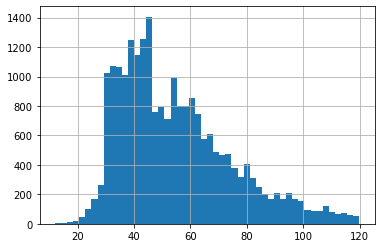

In [89]:
df_EAD['total_area'].hist(bins=50)
plt.show()

Большая часть квартрир лежит в диапазоне от 30 до 80 кв.м с пиком 45 кв.м, что ожидаемо, т.к. 25% 2к квартир по 45кв.м это пятиэтажки, а так же выше 9 этажа 1кк квартиры тоже по +-45 кв.м их 13%

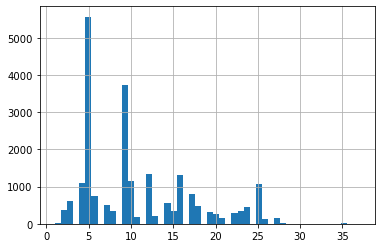

In [90]:
df_EAD['floors_total'].hist(bins=50)
plt.show()

In [91]:
print('Количество 5 этажных домов:', len(df_EAD.query('floors_total == 5')), "{:.1%}".format(len(df_EAD.query('floors_total == 5'))/len(df_EAD)))
print('Количество 9 этажных домов:', len(df_EAD.query('floors_total >= 9 and total_area >= 40 and total_area <= 50')), "{:.1%}".format(len(df_EAD.query('floors_total >= 9 and total_area >= 40 and total_area <= 50'))/len(df_EAD)))

Количество 5 этажных домов: 5564 24.6%
Количество 9 этажных домов: 2895 12.8%


#### <a name="4.1.2."></a> 4.1.2. Гистограмма цены квартиры.
<font>[к Оглавлению](#0.0)</font>

In [92]:
df_EAD['last_price'].describe().apply(lambda x: format(x, 'f'))

count    22592.000000
mean      5351.436570
std       3397.126243
min         12.000000
25%       3380.000000
50%       4500.000000
75%       6320.000000
max      39990.000000
Name: last_price, dtype: object

Минимальная цена в 12190 и max в 40млн могут быть выбросами. Проверим, что может так стоить.

In [93]:
df_EAD.query('last_price == 12190')

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,price_m2,kitchen_area_part,...,year_exp,locality_name,airports_nearest,cityCenters_nearest_km,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_name
15814,12190,100.0,51.0,25.0,3,2.9,16,5,121,0.25,...,2017,Санкт-Петербург,36765,12,0,<NA>,0,<NA>,241,другой


Посмотрев данные можно сразу сказать, что 12190 это округление, которое видимо собственник допустил при заполнении объявления. Надо исправить на 12млн. Так же видно, что в продаже квартира была 8 дней. Либо продали, либо сняли и поменяли стоимость на другую.

In [94]:
df.query('last_price > 37000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,coef_kitc,median_coef_kitc,cityCenters_nearest_km,price_m2,month_exp,year_exp,week_exp,floor_name,living_area_part,kitchen_area_part
3343,17,37272,100.6,2016-06-26,3,2.75,8,57.50,8,False,...,0.144831,0.13,7,370,6,2016,Sunday,последний,0.57,0.14
6032,20,39000,118.0,2017-08-10,4,3.00,4,89.20,4,False,...,0.112712,0.11,2,330,8,2017,Thursday,последний,0.76,0.11
7932,20,39900,55.3,2017-10-26,1,3.05,6,35.00,4,False,...,0.144665,0.25,2,721,10,2017,Thursday,другой,0.63,0.14
8059,18,39744,72.0,2018-09-19,2,3.05,11,46.80,7,False,...,0.429167,0.16,5,552,9,2018,Wednesday,другой,0.65,0.43
12302,6,39990,67.7,2015-06-25,3,3.10,7,42.90,6,False,...,0.132939,0.13,2,590,6,2015,Thursday,другой,0.63,0.13
14240,9,39000,91.0,2016-05-05,2,2.75,8,44.00,3,False,...,0.248352,0.16,<NA>,428,5,2016,Thursday,другой,0.48,0.25
15492,5,38000,109.0,2017-08-26,2,2.75,8,70.85,4,False,...,NaN,0.16,<NA>,348,8,2017,Saturday,другой,0.65,0.16


Квартиры более 37млн есть в самом центре и непосредственной близости от него и похоже, что цены действительны. Но 39,9 млн  за 1кк явно выброс и его не стоит учитывать при анализе данных.

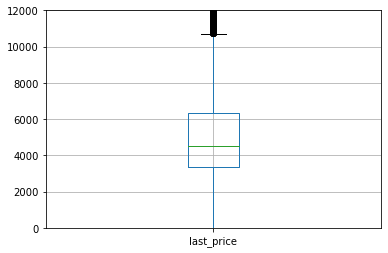

In [95]:
df_EAD.boxplot('last_price')
plt.ylim(0, 12000)
plt.show()

Видно на диаграмме выше, что верхний ус упирается в 11 млн. Выведем гистограмму цены до 11 млн.

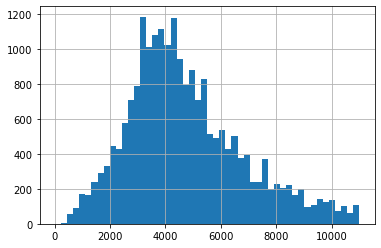

In [96]:
df_EAD.query('last_price < 11000')['last_price'].hist(bins=50)
plt.show()

Цена имеет верхние пики от 3.2 до 4.3 млн. Как варьируется цена по населенным пункат показано ниже на гистограмме.

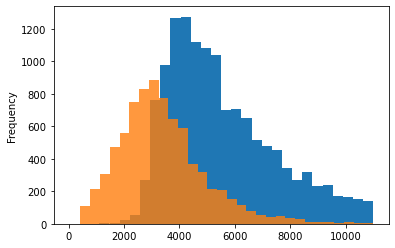

In [97]:
df_EAD.query('last_price < 11000 and locality_name == "Санкт-Петербург"')['last_price'].plot(kind='hist', bins=30)
df_EAD.query('last_price < 11000 and locality_name != "Санкт-Петербург"')['last_price'].plot(kind='hist', bins=30, alpha=0.8)
plt.show()

Если в Санкт-Петербурге цена начинается с 2,5 млн, то в области цена в 3млн является пиком по количеству предложений. На сам Питер пик цены приходится на 3,9 - 4,2млн

#### <a name="4.1.3."></a> 4.1.3. Гистограмма количества комнат.
<font>[к Оглавлению](#0.0)</font>

In [98]:
df_EAD['rooms'].describe()

count    22592.000000
mean         1.958348
std          0.907716
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

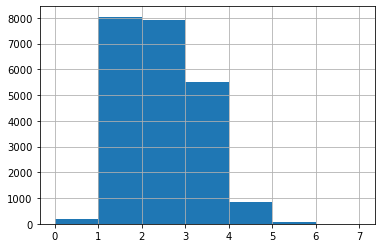

In [99]:
df['rooms'].hist(bins=7)
plt.show()

Приоритет в продаже как и предполагалось за 1к и 2к квартирами, хотя разрыв мог быть и больше. Скорей всего обусловлено ценой 1кк в Питере и цена 2кк в области похожи. Посмотрим по разбивке.

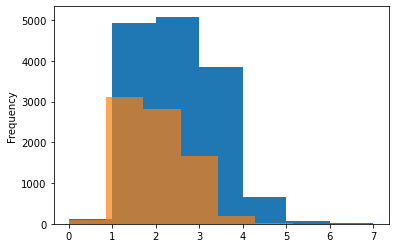

In [100]:
df.query('locality_name == "Санкт-Петербург"')['rooms'].plot(kind='hist', bins=7)
df.query('locality_name != "Санкт-Петербург"')['rooms'].plot(kind='hist', bins=7, alpha=0.7)
plt.show()

По гистограммам распределенным по городу и области видно, что в Питере на первом месте в продаже 2к квартиры, а в области 1кк.


#### <a name="4.1.4."></a> 4.1.4. Гистограмма высоты потолков.
<font>[к Оглавлению](#0.0)</font>

In [101]:
df_EAD['ceiling_height'].describe()

count    22592.000000
mean         2.728120
std          0.190167
min          2.300000
25%          2.600000
50%          2.750000
75%          2.750000
max          4.000000
Name: ceiling_height, dtype: float64

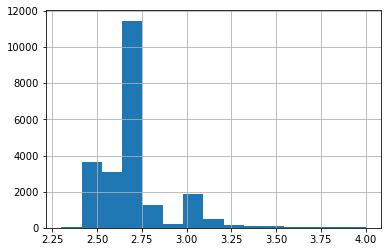

In [102]:
df['ceiling_height'].hist(bins=15)
plt.show()

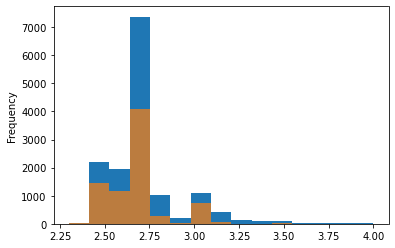

In [103]:
df.query('locality_name == "Санкт-Петербург"')['ceiling_height'].plot(kind='hist', bins=15)
df.query('locality_name != "Санкт-Петербург"')['ceiling_height'].plot(kind='hist', bins=15, alpha=0.7)
plt.show()

В среднем, параметр высоты потолков должен колебаться в пределах 2.5 - 2,8м. Минимальная высота потолка определяется строительными нормами и правилами обычно как 2.5 м. А потолки более 3 метров в старых домах которым 50 и более лет.
Так же видно что различия между городом и областью нет. Распределение равномерное, единственное, в области почти нет потолков более 3,2 метров.

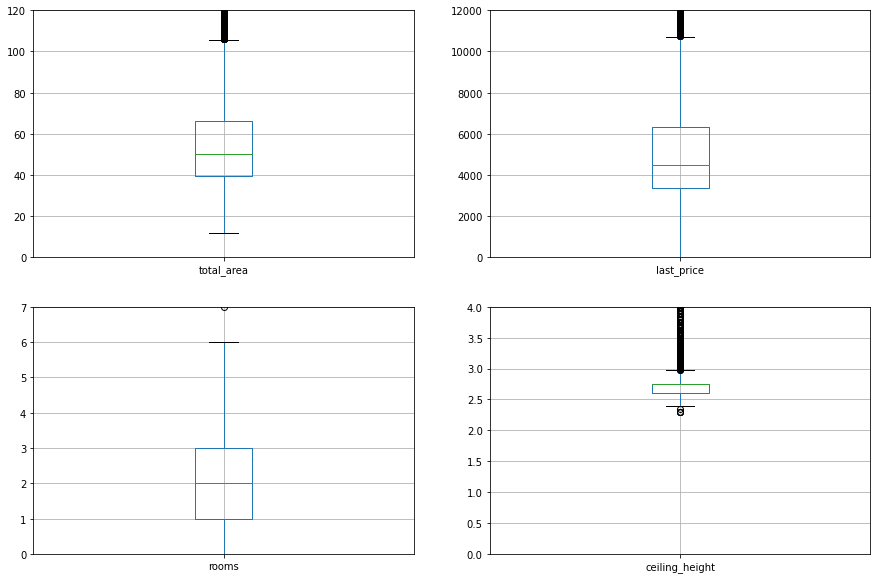

In [104]:
df_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']

ylims = [120, 12000, 7, 4]
rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(15,10))
count = 0
for row in range(rows):
    for col in range(cols):
        ax = df.boxplot(column=df_list[count], ax=axes[row,col], fontsize=10)
        ax.set_ylim([0, ylims[count]])
        count += 1

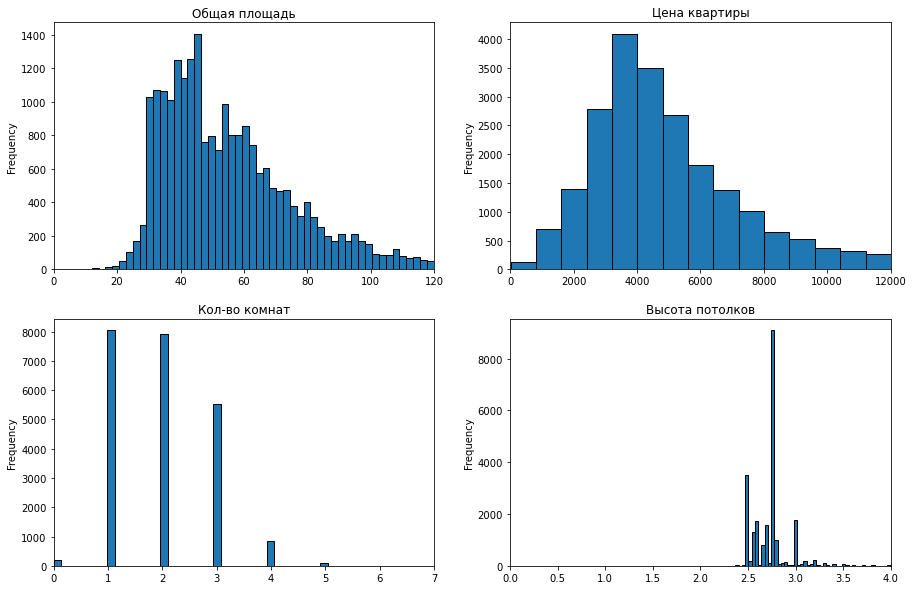

In [105]:
df_list = [df['total_area'], df['last_price'], df['rooms'], df['ceiling_height']]
df_titles_list = ['Общая площадь', 'Цена квартиры', 'Кол-во комнат', 'Высота потолков']

xlims_list = [120, 12000, 7, 4]
rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(15,10))
count = 0
for row in range(rows):
    for col in range(cols):
        ax = df_list[count].plot(kind='hist', bins=50, fontsize=10, title=df_titles_list[count], ec='black', ax=axes[row,col])
        ax.set_xlim([0, xlims_list[count]])
        count += 1

### <a name="4.2."></a> 4.2. Изучение времени продажи
<font>[к Оглавлению](#0.0)</font>

Посмотрим на значения в столбце колво дней в экспозиции

In [106]:
df_EAD['days_exposition'].describe()

count    19701.000000
mean       175.607634
std        213.800014
min          1.000000
25%         44.000000
50%         93.000000
75%        223.000000
max       1580.000000
Name: days_exposition, dtype: float64

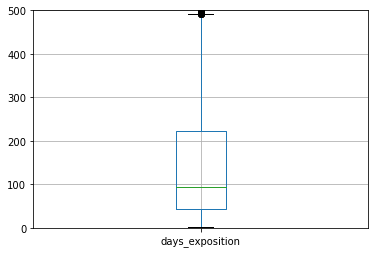

In [107]:
df.boxplot('days_exposition')
plt.ylim(0, 500)
plt.show()

Большая часть значений лежит в диапазоне от 45 до 200 дней. Продать квартиру – дело небыстрое.
Нижний ус упирается в 1день, минимальное значение, а верхний заканчивается в около 490 дней.
Маловероятно, что за 1 день продали квартиру, скорей всего объявление было на другом сайте какое то время, а когда добавили объявлнение на сайт Яндекс Недвижимости, то поступило предожение от покупателя о покупке, но скорей всего с другого сайта. Точно можно сказать поняв стоимость и характеристики квартиры. Может действительно цена супер была.

In [108]:
df_EAD.query('days_exposition == 1')

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,price_m2,kitchen_area_part,...,year_exp,locality_name,airports_nearest,cityCenters_nearest_km,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_name
1537,4000,49.9,25.0,10.0,2,2.5,9,1,80,0.2,...,2019,Санкт-Петербург,13567,14,1,20,1,681,1,первый


Квартира похоже действительно была хорошая и продажа могла быть за 1 день. 2кк за 4млн и 50 кв.м. с кухней в 10кв.м.

Построим гистограмму для экспозиции 

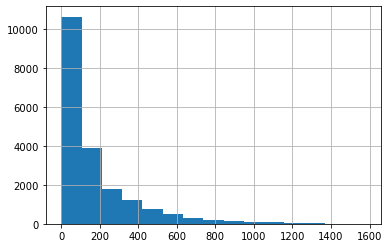

In [109]:
df_EAD['days_exposition'].hist(bins=15)
plt.show()

Посмотрим на зависимость времени продажи по городу и области, но ограничим продажу 1 годом

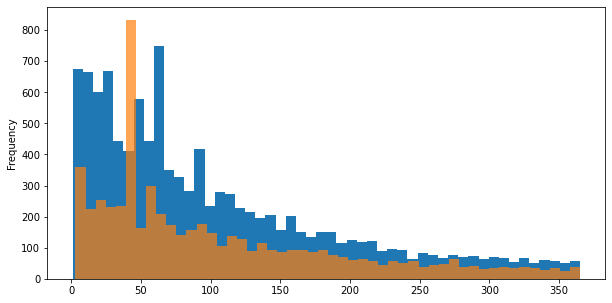

In [110]:
df_EAD.query('days_exposition <= 365 and locality_name == "Санкт-Петербург"')['days_exposition'].plot(kind='hist', bins=50, figsize=(10,5))
df_EAD.query('days_exposition <= 365 and locality_name != "Санкт-Петербург"')['days_exposition'].plot(kind='hist', bins=50, figsize=(10,5), alpha=0.7)
plt.show()

Время продажи квартиры, что в Питере, что в области совпадают. Есть пики хорошей разницы. В области большой всплеск 'продаж' через полтора месяца. Интересно узнать почему. В Питере наоборот на пике продажы первый месяц, потом спад на месяц и на третий месяц новый пик продаж. Потом по угасающей без серьезных колебаний. Возможно, объяснение этому, время действия платных обявлений и показа самого объявления, если оно бесплатно. Через месяц оно уходит с рекламы и собственник его поднимает. И получается, что в Питере собственник выложил объявление, забыл о нем и через месяц оно либо ушло на 20 страницу, куда ни кто не заходит, либо ушло в архив. По истечении второго месяца собственник поднимает его и вот новый всплеск продажи. Но эта теория не объясняет всплеск продаж в области на 45 день!

Посмотрим срез по области на 45 день продаж 

In [111]:
df_EAD_exp_45 = df_EAD.query('days_exposition == 45 and locality_name != "Санкт-Петербург"')
df_EAD_exp_45['days_exposition'].value_counts()

45    573
Name: days_exposition, dtype: Int64

In [112]:
df_EAD_exp_45.head(5)

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,price_m2,kitchen_area_part,...,year_exp,locality_name,airports_nearest,cityCenters_nearest_km,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_name
83,2500,63.0,43.0,9.0,3,2.50,5,4,39,0.14,...,2018,посёлок городского типа Сиверский,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,другой
102,3850,72.3,27.4,23.6,2,3.00,3,2,53,0.33,...,2017,деревня Пикколово,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,другой
143,4350,55.0,31.2,8.3,2,2.57,9,2,79,0.15,...,2017,Петергоф,45958,34,1,589,0,<NA>,45,другой
147,3100,47.3,27.5,8.5,2,2.75,5,2,65,0.18,...,2017,городской посёлок Янино-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,другой
155,2300,60.0,39.0,9.6,2,3.00,3,1,38,0.16,...,2017,посёлок Плодовое,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,первый


В таблице все данные разные, какой то аномалии по данным не видно. Надо искать в другом месте.

Всплеск продаж на 45 день по области можно объяснить из данных сайта о продаже недвижимости. На нем указано, что Продажа квартиры по бесплатному объявлению до 4,5 млн — 45 дней, от 4,5 до 10 млн — 60 дней, от 10 млн — 90 дней. По платному объявлению 30 дней.

Теперь понятны три пика по Питеру. Шаг в 30 дней. Интресную особенность видно. В Питере большая часть объявлений платная, а в области бесплатная.

#### <a name="4.2.1."></a> 4.2.1.  Быстрые и медленные продажи
<font>[к Оглавлению](#0.0)</font>

In [113]:
print('Среднее время продажи квартиры', round(df['days_exposition'].mean()), 'дней')
print('Время продажи квартиры по медиане', round(df['days_exposition'].median()), 'дней')

Среднее время продажи квартиры 176 дней
Время продажи квартиры по медиане 93 дней


Медиана по продаже в 2 раза меньше, чем среднее значение. Медианна продажи в 90 дней хороший показатель, но в наших данных есть выбросы в 30, 45, 60 и 90 дней которые должны существенно менять значения среднего. Уберем их и посмотрим результат

Построим график продаж до 6 месяцев и посмотри как продажи себя покажут.

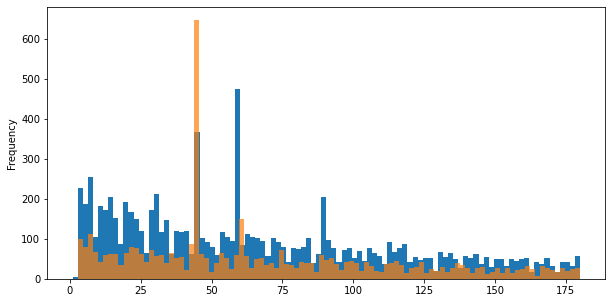

In [114]:
df.query(
    'days_exposition <= 180 and locality_name == "Санкт-Петербург"')['days_exposition'].plot(
    kind='hist', bins=100, figsize=(10,5))
df.query(
    'days_exposition <= 180 and locality_name != "Санкт-Петербург"')['days_exposition'].plot(
    kind='hist', bins=100, figsize=(10,5), alpha=0.7)
plt.show()

Видны выбросы в днях снятия объявления с рекламы, уберем их

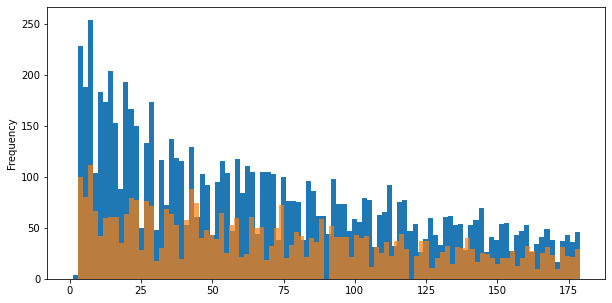

In [115]:
df.query(
    '(days_exposition < 180) and (locality_name == "Санкт-Петербург") \
    and (days_exposition not in (30, 45, 60, 90, 120))')['days_exposition'].plot(
    kind='hist', bins=100, figsize=(10,5))
df.query(
    '(days_exposition < 180) and (locality_name != "Санкт-Петербург") \
    and (days_exposition not in (30, 45, 60, 90, 120))')['days_exposition'].plot(
    kind='hist', bins=100, figsize=(10,5), alpha=0.7)
plt.show()

Вот уже красиво и без ужасных выбросов. Теперь можно сравнить среднее время продажы и медиану, повлияли ли выбросы на них. 

In [116]:
print('Среднее время продажи квартиры', round(df.query(
    'days_exposition not in (30, 45, 60, 90, 120)')['days_exposition'].mean()), 'дней')
print('Время продажи квартиры по медиане', round(df.query(
    'days_exposition not in (30, 45, 60, 90, 120)')['days_exposition'].median()), 'дней')

Среднее время продажи квартиры 188 дней
Время продажи квартиры по медиане 108 дней


Выбросы хорошо повлияли на среднее и медианное время продажи. Среднее увеличилось на 2,3%, а медиана на 16%

Посмотрим, что за провалы виднеются на гистограмме без выбросов

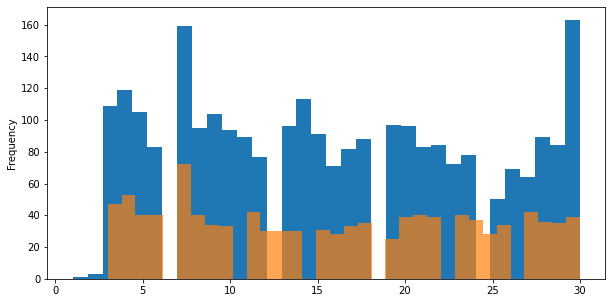

In [117]:
df.query(
    '(days_exposition < 31) and (locality_name == "Санкт-Петербург")')['days_exposition'].plot(
    kind='hist', bins=34, figsize=(10,5))
df.query(
    '(days_exposition < 31) and (locality_name != "Санкт-Петербург")')['days_exposition'].plot(
    kind='hist', bins=34, figsize=(10,5), alpha=0.7)
plt.show()

Провалы на гисторамме можно отнести к неделям. По выходным продаж нет, а начало недели выражено продажами. Начало второй недели самый пик продаж. Можно предположить, что быстрые продажи это продажи в течение первых двух-трех недель. Выброс в конце графика это закрытые платные объявления.

Посмотрим как это выглядит на двух месяцах

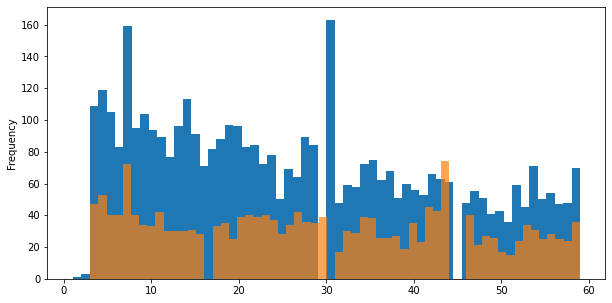

In [118]:
df.query(
    '(days_exposition < 60) and (days_exposition !=45) and (locality_name == "Санкт-Петербург")')['days_exposition'].plot(
    kind='hist', bins=60, figsize=(10,5))
df.query(
    '(days_exposition < 60) and (days_exposition !=45) and (locality_name != "Санкт-Петербург")')['days_exposition'].plot(
    kind='hist', bins=60, figsize=(10,5), alpha=0.7)
plt.show()

На отрезке в два месяца видно,что по Питеру две-три недели можно назвать самыми лучшими, по области такой явной зависимости нет.

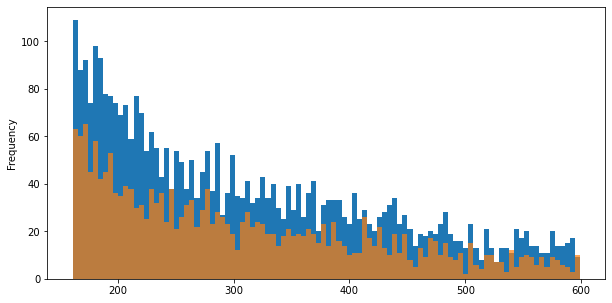

In [119]:
df.query(
    '(days_exposition > 160) and (days_exposition <600) and (locality_name == "Санкт-Петербург")')['days_exposition'].plot(
    kind='hist', bins=100, figsize=(10,5))
df.query(
    '(days_exposition > 160) and (days_exposition <600) and (locality_name != "Санкт-Петербург")')['days_exposition'].plot(
    kind='hist', bins=100, figsize=(10,5), alpha=0.7)
plt.show()

Долгими продажами можно назвать те, которые продаются более 250 дней.

### <a name="4.3."></a> 4.3. Чистка редких и выбивающихся значений
<font>[к Оглавлению](#0.0)</font>

Чистку редких и выбивающихся значений делали по пути проекта. Выводы прописаны и характер этих значений описан. Что можно отметить дополнительно, это то что много данных люди сами пишут не точно, половина из них опечатки. По площади 800кв.м это не квартира, а общежития и такие объекты сразу были убраны на моменте заполнения пропусков. Они так же за собой убрали и количество комнат в 19 шт и цену в 800тыс. Единственное, что осталось, это площадь кухонь за 20кв.м. Ее пока не убирали.

In [120]:
df_EAD.describe()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,price_m2,kitchen_area_part,living_area_part,month_exp,year_exp,airports_nearest,cityCenters_nearest_km,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22592.000000,22592.000000,22591.000000,22395.000000,22592.000000,22592.000000,22592.000000,22592.000000,22592.000000,22395.000000,22591.000000,22592.000000,22592.000000,17089.000000,17108.000000,17109.000000,7361.000000,17109.000000,8388.000000,19701.000000
mean,5351.436570,54.739961,31.336770,9.881086,1.958348,2.728120,10.784437,5.917493,95.603444,0.189661,0.564826,6.397353,2017.382215,28844.027328,14.579261,0.581331,495.188697,0.739728,525.025036,175.607634
std,3397.126243,19.927615,13.703081,4.331996,0.907716,0.190167,6.621736,4.913263,37.293650,0.070624,0.102605,3.490072,1.027844,12816.867366,8.519463,0.778634,344.473213,0.916811,277.087438,213.800014
min,12.000000,12.000000,2.000000,1.300000,0.000000,2.300000,1.000000,1.000000,0.000000,0.040000,0.040000,1.000000,2014.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,3380.000000,39.500000,18.500000,7.000000,1.000000,2.600000,5.000000,2.000000,75.000000,0.140000,0.500000,3.000000,2017.000000,18321.000000,10.000000,0.000000,289.000000,0.000000,304.000000,44.000000
50%,4500.000000,50.400000,30.000000,9.000000,2.000000,2.750000,9.000000,4.000000,94.000000,0.170000,0.570000,6.000000,2017.000000,26944.000000,13.000000,0.000000,458.000000,0.000000,510.000000,93.000000
75%,6320.000000,66.000000,40.300000,11.100000,3.000000,2.750000,16.000000,8.000000,112.000000,0.240000,0.640000,10.000000,2018.000000,37434.000000,16.000000,1.000000,617.000000,1.000000,733.250000,223.000000
max,39990.000000,119.800000,101.000000,64.000000,7.000000,4.000000,37.000000,33.000000,848.000000,0.790000,1.000000,12.000000,2019.000000,84869.000000,66.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### <a name="4.4."></a> 4.4. Влияние факторов на стоимость квартиры
<font>[к Оглавлению](#0.0)</font>

#### <a name="4.4.1."></a> 4.4.1. Зависимость цены от квадратного метра:
<font>[к Оглавлению](#0.0)</font>

Посмотрим данные в стоимости за квадратный метр и уберем выбросы(цена за метр указана в тысячах)

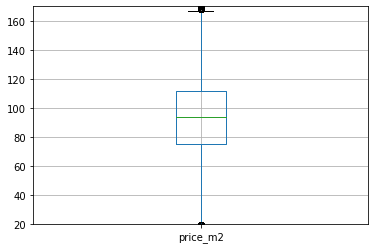

In [121]:
df.boxplot('price_m2')
plt.ylim(20, 170)
plt.show()

Ориентируемся по усам и сделаем срез от 20000 р за кв.м до 170000р 

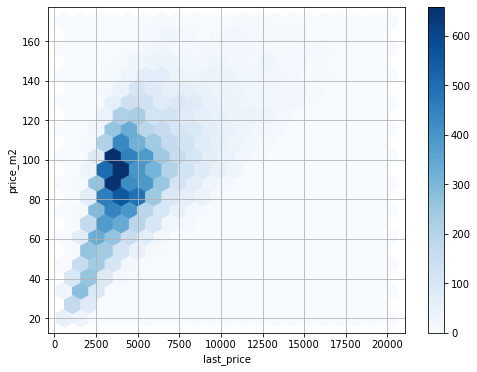

In [122]:
df_price_m2 = df.query('price_m2 >= 20 and price_m2 <=170')
#df_price_m2.plot(x='last_price', y='price_m2', grid=True, kind='scatter', figsize=(12,7))
df_price_m2.plot(x='last_price', y='price_m2', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, cmap="Blues")
plt.show()

По графику четко видно, самые лучшие квартиры от 4 до 5 млн. и ценой за квадрат от 80 и до 110тыс.рублей

По данным из таблицы df_price_m2 посчитаем коэффициент корреляции Пирсона между стоимостью квартиры и ценой за квадратный метр. Коэффициент выведем на экран

In [123]:
print('Корреляция цены квартиры к цене м2 -', round(df_price_m2['last_price'].corr(df_price_m2['price_m2']), 3))

Корреляция цены квартиры к цене м2 - 0.641


По графикам и коэффициенту корреляции видим, что взаимосвязь между изменением цены за квадратный метр и стоимостью квартиры  есть, и она немного выше средней.

#### <a name="4.4.2."></a> 4.4.2. Зависимость цены от числа комнат:
<font>[к Оглавлению](#0.0)</font>

Сократим количество комнат до 5 и цену продажи до 20млн

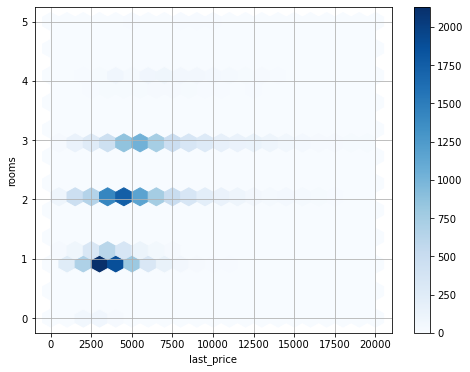

In [124]:
df_rooms = df.query('rooms <=5 and last_price <=20000')
#df_rooms.plot(x='rooms', y='last_price', grid=True, kind='scatter', figsize=(12,7))
df_rooms.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, cmap="Blues")
plt.show()

Самые идеальные квартиры это 1к от 2,5 до 4 млн и 2к 4-5млн, а в 3к от 5 до 5,5млн

In [125]:
print('Корреляция цены к кол-ву комнат -', round(df_rooms['last_price'].corr(df_rooms['rooms']), 3))

Корреляция цены к кол-ву комнат - 0.437


По графикам и коэффициенту корреляции видим, что взаимосвязь между стоимостью квартиры и количеством комнат есть, она средняя. С увеличеним кол-ва комнат цена растет.

#### <a name="4.4.3."></a> 4.4.3. Зависимость цены от удаленности от центра:
<font>[к Оглавлению](#0.0)</font>

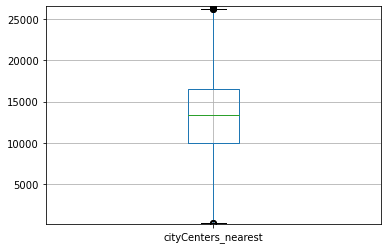

In [126]:
df.boxplot('cityCenters_nearest')
plt.ylim(200, 26500)
plt.show()

Уберем из данных пропуски и разделим на Питер и область

In [127]:
print('Пропусков до центра по Питеру', df.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].isnull().sum())
print('Пропусков до центра по области', df.query('locality_name != "Санкт-Петербург"')['cityCenters_nearest'].isnull().sum())

Пропусков до центра по Питеру 47
Пропусков до центра по области 5437


In [128]:
print('Кол-во данных до центра по Питеру', df.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].count())
print('Кол-во данных до центра по Области ', df.query('locality_name != "Санкт-Петербург"')['cityCenters_nearest'].count())

Кол-во данных до центра по Питеру 14647
Кол-во данных до центра по Области  2461


Создадим таблицу всех значений до центра по Питеру и такуюже по Области  и выведем среднее значение

In [129]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)

In [130]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')

In [131]:
df_cityCentr_Piter = df.query('cityCenters_nearest > 0 and locality_name == "Санкт-Петербург"')['cityCenters_nearest']
df_cityCentr_obl = df.query('cityCenters_nearest > 0 and locality_name != "Санкт-Петербург"')['cityCenters_nearest']

print('Среднее расстояние по Питеру', round(df_cityCentr_Piter.mean()))
print('Среднее расстояние по области', round(df_cityCentr_obl.mean()))

Среднее расстояние по Питеру 11958
Среднее расстояние по области 30225


In [132]:
df.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].isnull().sum()

0

In [133]:
df_cityCentr_Piter.head()

0    16028
2    13933
3     8098
6    11634
8    15008
Name: cityCenters_nearest, dtype: int32

Расстояние до центра по Питеру. Посмотрим на корреляцию, ограничив цену 40млн.

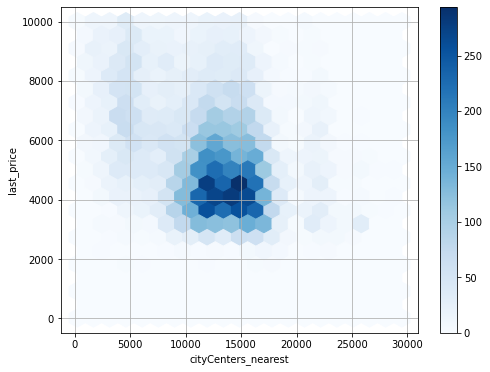

In [135]:
df_cityCentr_Piter = df.query('cityCenters_nearest > 0 and locality_name == "Санкт-Петербург" and last_price <=10000')
df_cityCentr_Piter.plot(x='cityCenters_nearest', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, cmap="Blues")
plt.show()

Большинство квартир в Питере находятся на расстоянии от 10км и до 17км. Нижняя планка цены ярко выражена на 3,5млн и пиком в 4-4,5 млн.  Есть небольшая часть объектов в 5 км от центра и с ценой от 6 до 10 млн.

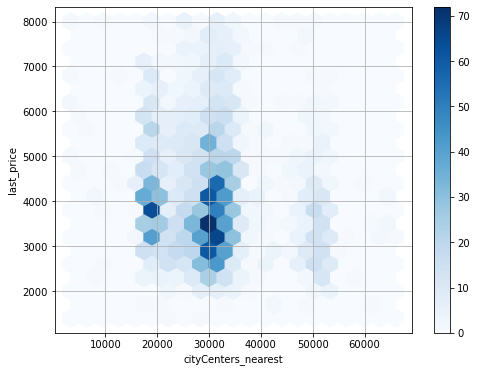

In [136]:
df_cityCentr_obl = df.query('cityCenters_nearest > 0 and locality_name != "Санкт-Петербург" and last_price <=8000')
df_cityCentr_obl.plot(x='cityCenters_nearest', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, cmap="Blues")
plt.show()

Квартиры по области разбиты на 3 расстояния. Самое большое количество квартир от 25км и до 35км. Второе по кол-ву 17-20км ,  и третье самое маленькое скопление на 50 км. Цены сильно не выражены и растянуты от 2,2 млн до 5млн

In [137]:
print('Корреляция цены от расстояния Питер - центр:', round(df_cityCentr_Piter['last_price'].corr(df_cityCentr_Piter['cityCenters_nearest']), 3))
print('Корреляция цены от расстояния область - центр:', round(df_cityCentr_obl['last_price'].corr(df_cityCentr_obl['cityCenters_nearest']), 3))

Корреляция цены от расстояния Питер - центр: -0.333
Корреляция цены от расстояния область - центр: -0.106


Корреляция отрицательная. С увеличением расстояния цена падает. Зависимость по Питеру в три раза более выражена, чем по области, и находится ниже средней зависимоти.

#### <a name="4.4.4."></a> 4.4.4. Зависимость цены от этажа, на котором находится квартира:
<font>[к Оглавлению](#0.0)</font>

In [138]:
df_floor_name = round(df[['floor_name', 'last_price']].pivot_table(index='floor_name', values='last_price'))
df_floor_name

,last_price
floor_name,
другой,5606.0
первый,4311.0
последний,4940.0


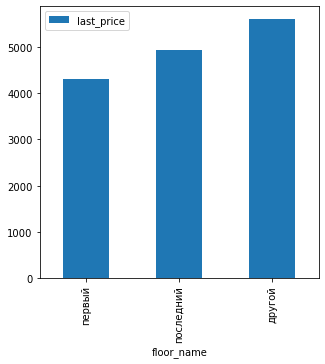

In [139]:
df_floor_name.sort_values(by='last_price', ascending=True).plot(kind='bar', y = 'last_price', figsize = (5, 5))
plt.show()

Первый этаж – самый дешевый, на последний этаж поднимутся не все. Так же риск крыша и если нет лифта, то пешком. А этажи между, самые популярные и дорогие.

#### <a name="4.4.5."></a> 4.4.5. Зависимость цены от даты размещения квартиры:
<font>[к Оглавлению](#0.0)</font>

In [141]:
df[['week_exp', 'month_exp', 'year_exp', 'last_price']].corr()

,month_exp,year_exp,last_price
month_exp,1.000000,-0.269426,0.000781
year_exp,-0.269426,1.000000,-0.016038
last_price,0.000781,-0.016038,1.000000


##### Средняя цена по дню недели

In [142]:
df_week = round(df[['week_exp', 'last_price']].pivot_table(index='week_exp', values='last_price'))
df_week.sort_values('week_exp')

,last_price
week_exp,
Friday,5324.0
Monday,5346.0
Saturday,5202.0
Sunday,5239.0
Thursday,5387.0
Tuesday,5419.0
Wednesday,5396.0


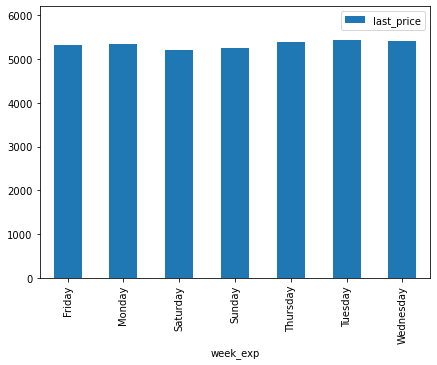

In [143]:
df_week.sort_values(by='week_exp', ascending=True).plot(kind='bar', y = 'last_price', figsize = (7, 5), ylim=(0, 6200))
plt.show()

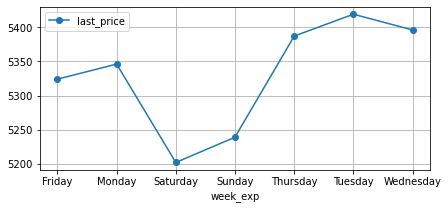

In [144]:
df_week_price = df_week.pivot_table(index='week_exp', values='last_price').reset_index()
df_week_price.plot(x='week_exp', y='last_price',style='o-', figsize=(7, 3), grid=True)
plt.show()

##### Средняя цена по месяцу

In [145]:
df_month = round(df[['month_exp', 'last_price']].pivot_table(index='month_exp', values='last_price'))
df_month.sort_values('month_exp')

,last_price
month_exp,
1,5399.0
2,5331.0
3,5314.0
4,5452.0
5,5223.0
6,5264.0
7,5290.0
8,5415.0
9,5476.0


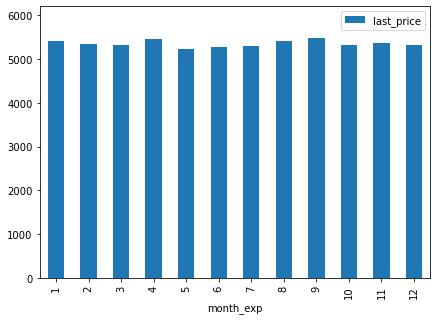

In [146]:
df_month.sort_values(by='month_exp', ascending=True).plot(kind='bar', y = 'last_price', figsize = (7, 5), ylim=(0, 6200))
plt.show()

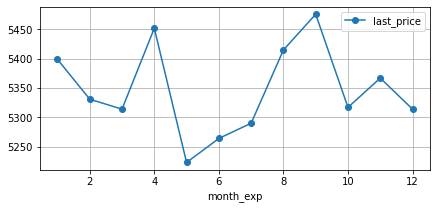

In [147]:
df_month_price = df_month.pivot_table(index='month_exp', values='last_price').reset_index()
df_month_price.plot(x='month_exp', y='last_price',style='o-', figsize=(7, 3), grid=True)
plt.show()

##### Средняя цена по году

In [148]:
df_year = round(df[['year_exp', 'last_price']].pivot_table(index='year_exp', values='last_price'))
df_year.sort_values('year_exp')

,last_price
year_exp,
2014,8083.0
2015,5969.0
2016,5314.0
2017,5247.0
2018,5234.0
2019,5684.0


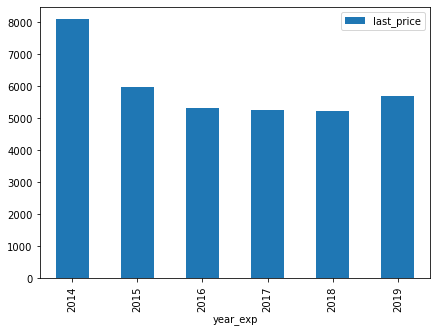

In [149]:
df_year.sort_values(by='year_exp', ascending=True).plot(kind='bar', y = 'last_price', figsize = (7, 5))
plt.show()

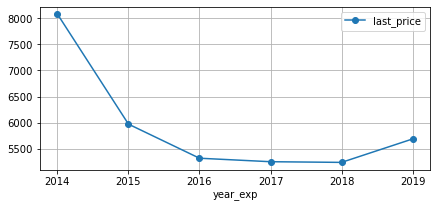

In [150]:
df_year_price = (df_year.pivot_table(
    index='year_exp', values='last_price')
                 .reset_index().plot(x='year_exp', y='last_price',style='o-', figsize=(7, 3), grid=True))
plt.show()

1. Зависимость цены от дня недели публикации практически никак не зависит. Проглядывается небольшая зависимость. Понедельник и среда самые популярные дни для публикации объявления. Пятница самый не популярный день. Это может зависеть от работы человека, который публикует объявление. К пятнице много завалов и публикации снижаются, а понедельник и среду многие считают  легкими днями и можно посвятить время себе.
2. Зависимость цены от месяца публикации - апрель и сентябрь оказались самыми большими по цене на опубликованные квартиры, чем по остальным месяцам. Самыми низким оказались май и июнь. В мае очень много выходных, праздничных дней, а июнь начало лета и отпусков, не до продажи. Сентябрь, возвращение с отпусков, можно подумать и о продаже квартиры. Апрель не может похвастаться точной догадкой, но закончилась зима и впереди лето, люди строят планы на жизнь.
3. Зависимость цены от года публикации - 2014г. очень выделяется, самые большие цены. Рассмотрим его чуть подробнее.Самый маленький год 2018. По ажиотажу 2014-15 годов, люди завышали цены, потом осознавали, что не покупают и снижали. Рынок был падающий до 2018. Достигнув дна, цены пошли вверх.

In [151]:
df_2014 = round(df.query('year_exp == 2014')[['month_exp', 'last_price']].pivot_table(index='month_exp', values='last_price'))
df_2014.sort_values('month_exp')

,last_price
month_exp,
11,10809.0
12,7682.0


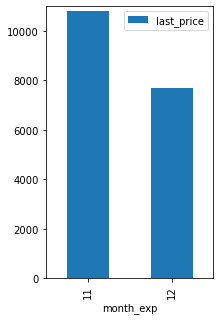

In [152]:
df_2014.sort_values(by='month_exp', ascending=True).plot(kind='bar', y = 'last_price', figsize = (3, 5), ylim=(0, 11000))
plt.show()

Видимо зима 2014, с курсом доллара, создала ажиотаж на покупку квартир и собственики начали сильно завышать цены. После ажиотажа пошел спад рынка недвижимости аж до 2018 года

### <a name="4.5."></a> 4.5. Топ 10 населенных пунктов по кол-ву объявлений
<font>[к Оглавлению](#0.0)</font>

При анализе населенных пунктов было замечено, что есть три Мурино. Поправим данные и причешем.

In [153]:
df['locality_name'] = df['locality_name'].str.replace('ё','е')
df['locality_name'] = df['locality_name'].str.replace('поселок','')
df['locality_name'] = df['locality_name'].str.replace('деревня','')
df['locality_name'] = df['locality_name'].str.replace(' ','')
#df['locality_name'].str.lower()

Соберем Топ 10 населенных пунктов по количеству объявлений, посчитаем среднюю стоимость за квадратный метр. Выделим населенные пункты с самой высокой и самой низкой стоимостью жилья. 

In [154]:
top_10 = df['locality_name'].value_counts().head(10)
top_10

Санкт-Петербург    14694
Мурино               590
Кудрово              472
Шушары               439
Всеволожск           395
Пушкин               350
Колпино              336
Парголово            326
Гатчина              304
Выборг               232
Name: locality_name, dtype: int64

In [155]:
top_10_names = list(top_10.index)

In [156]:
(
    df.query('locality_name in @top_10_names')
    .pivot_table(index='locality_name', values='price_m2')
    .sort_values(by='price_m2', ascending=False).round(2)
)

,price_m2
locality_name,
Санкт-Петербург,110.24
Пушкин,101.85
Кудрово,94.83
Парголово,89.89
Мурино,85.61
Шушары,78.17
Колпино,74.90
Гатчина,68.44
Всеволожск,68.20


Топ 5 самой высокой и низкой цены

In [157]:
top = df['locality_name'].value_counts()
top_names = list(top.index)

In [158]:
(
    df.query('locality_name in @top_names')
    .pivot_table(index='locality_name', values='last_price')
    .sort_values(by='last_price', ascending=False).round()
)

,last_price
locality_name,
Санкт-Петербург,6380.0
Зеленогорск,6144.0
Сестрорецк,5962.0
Пушкин,5697.0
Репино,4800.0
...,...
Совхозный,518.0
Бор,500.0
ЧудскойБор,500.0


In [159]:
(df
    .groupby(['locality_name'])
    .agg({'locality_name': 'count', 'price_m2' : ['mean', 'min', 'max']})
    .sort_values(by=[('locality_name', 'count')], ascending=False)
    .head(10))

locality_name    price_m2         
                        count        mean min  max
locality_name                                     
Санкт-Петербург         14694  110.240030   0  848
Мурино                    590   85.605085  50  138
Кудрово                   472   94.828390  54  160
Шушары                    439   78.166287  47  147
Всеволожск                395   68.202532  31  640
Пушкин                    350  101.845714  59  256
Колпино                   336   74.898810  47  125
Парголово                 326   89.892638  48  138
Гатчина                   304   68.437500  10  146
Выборг                    232   57.775862  18   94

Стоимость жилья и стоимость квадратного метра различается. Если в квадратном метре второе место занимал Пушкин, то в цене он уже на 4 строке. В тоже время второе и третье место по цене не вошли в топ 10 количества объявлений, но по цене показали очень высокий уровень. Самые низкие цены в деревнях и пселках.

### <a name="4.6."></a> 4.6. Изученим предложения по квартирам в зависимости от расстояния
<font>[к Оглавлению](#0.0)</font>

Создадим переменную в которой удалим пропушенные названия в наименовании населенных пунктов. Здесь же создадим новый столбец, который в километрах показывает расстояние до центра Санкт-Петербурга. Удалим все пропуски в столбце расстояние до центра.

In [160]:
df_EAD_km = df_EAD.dropna(subset = ['locality_name'])

In [161]:
df_EAD_km = df_EAD_km.dropna(subset = ['cityCenters_nearest_km'])

In [163]:
df_EAD_km.head()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,price_m2,kitchen_area_part,...,year_exp,locality_name,airports_nearest,cityCenters_nearest_km,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_name
0,13000,108.0,51.0,25.0,3,2.70,16,8,120,0.23,...,2019,Санкт-Петербург,18863,16,1,482,2,755,<NA>,другой
1,3350,40.4,18.6,11.0,1,2.75,11,1,82,0.27,...,2018,посёлок Шушары,12817,19,0,<NA>,0,<NA>,81,первый
2,5196,56.0,34.3,8.3,2,2.75,5,4,92,0.15,...,2015,Санкт-Петербург,21741,14,1,90,2,574,558,другой
3,10000,100.0,32.0,41.0,2,3.03,14,13,100,0.41,...,2018,Санкт-Петербург,31856,8,2,112,1,48,121,другой
5,3700,37.3,10.6,14.4,1,2.75,26,6,99,0.39,...,2017,посёлок Парголово,52996,19,0,<NA>,0,<NA>,155,другой


Посчитаем среднюю цену каждого километра  и построим график, с зависимостью цены от километров от центра. Ограничим наш график только показателями из Санкт-Петербурга

In [164]:
df_EAD_spb = df_EAD_km.query('locality_name == "Санкт-Петербург"')
df_EAD_spb_price = df_EAD_spb.pivot_table(index='cityCenters_nearest_km', values='last_price')

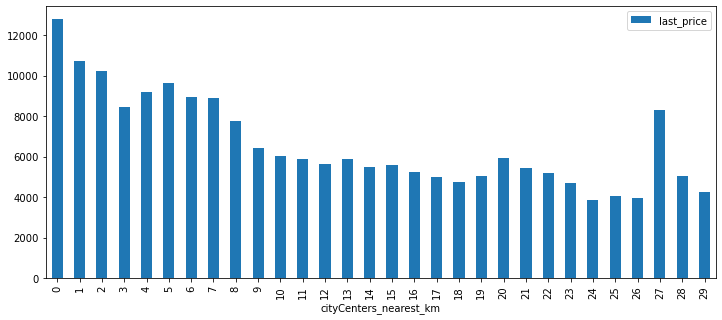

In [166]:
df_EAD_spb_price.sort_values(by='cityCenters_nearest_km', ascending=True).plot(kind='bar', y = 'last_price', figsize = (12, 5))
plt.show()

Ожидаемо, что в самом центре (в радиусе до 1 км) средняя цена на квартиру стремится к 15 млн р. Если опираться на резкое падение цены по графику, то центр ограничен радиусом в 9 км, далее средняя цена довольно заметно падает. На 3км от центра цена заметно ниже соседних показателей, возможно там находятся дома с малогабаритными квартирами и старой постройки. На 4км уже пик, который не сильно уступает по цене 1 и 2 км и заметно выше 5,6,7 км. Возможно это участки элитных домов с дорогими квартирами. Пик 27 км, наверное обусловлены областью. Проверим.

In [167]:
df_EAD_spb.query('cityCenters_nearest_km == 27').sort_values(by='cityCenters_nearest_km', ascending=False)

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,price_m2,kitchen_area_part,...,year_exp,locality_name,airports_nearest,cityCenters_nearest_km,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_name
699,14350,74.0,30.0,25.0,2,3.13,5,3,193,0.34,...,2017,Санкт-Петербург,23888,27,1,1496,0,<NA>,128,другой
5675,2250,32.0,16.5,7.0,1,3.00,2,2,70,0.22,...,2018,Санкт-Петербург,24006,27,0,<NA>,0,<NA>,178,последний


Да, смешные выбросы. По 27 км аж 2 объявления за 2 и 14 млн, вот и среднее в 8млн. Улыбнуло. По 20 км такая же ситуация. Много новостроя от 35этажей и с квартирами от 10мл до 3 млн Средняя цена и прыгнула до 6,5млн.

### <a name="4.7."></a> 4.7. Выделим сегмент квартир в центре Санкт-Петербурга
<font>[к Оглавлению](#0.0)</font>

#### <a name="4.7.1."></a> 4.7.1. Зависимость цены от площадь, цена, число комнат, высота потолков для центра Санкт-Петербурга
<font>[к Оглавлению](#0.0)</font>

Выделим сегмент квартир в центральной зоне (до 9 км) и проанализируем эту территорию - изучим следующие параметры: площадь, цена, число комнат, высота потолков.

In [168]:
df_in_center = df_EAD.query('cityCenters_nearest_km > 0 and cityCenters_nearest_km < 9')
df_in_center.head()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,price_m2,kitchen_area_part,...,year_exp,locality_name,airports_nearest,cityCenters_nearest_km,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_name
3,10000,100.0,32.0,41.0,2,3.03,14,13,100,0.41,...,2018,Санкт-Петербург,31856,8,2,112,1,48,121,другой
22,6500,97.2,46.5,19.6,2,3.00,3,1,66,0.20,...,2015,Санкт-Петербург,20052,2,3,411,3,124,265,первый
55,7990,74.0,43.0,20.0,2,3.00,4,4,107,0.27,...,2017,Санкт-Петербург,22568,4,1,363,0,<NA>,609,последний
57,20000,118.0,68.0,16.0,3,3.00,9,7,169,0.14,...,2018,Санкт-Петербург,26055,5,1,648,1,779,37,другой
64,3400,30.0,16.0,7.0,1,2.75,5,1,113,0.23,...,2018,Санкт-Петербург,39053,8,1,382,0,<NA>,14,первый


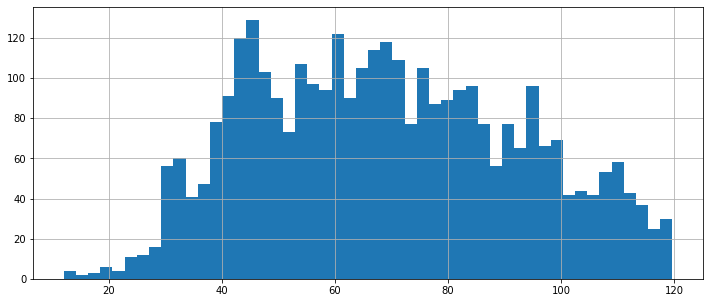

In [169]:
df_in_center['total_area'].hist(bins=50, figsize = (12, 5))
plt.show()

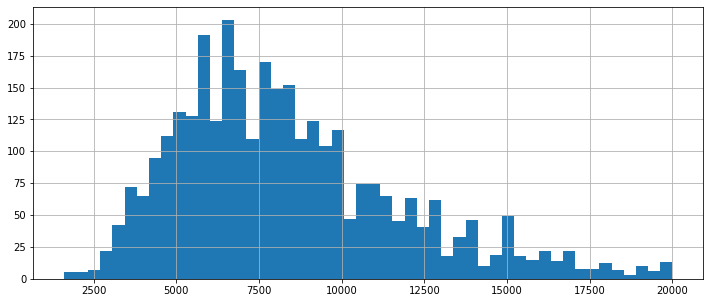

In [170]:
df_in_center.query('last_price <= 20000')['last_price'].hist(bins=50, figsize = (12, 5))
plt.show()

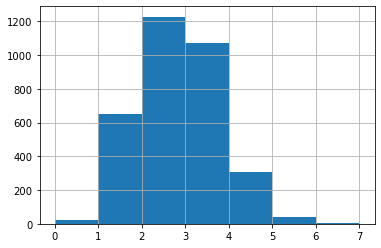

In [171]:
df_in_center['rooms'].hist(bins=7)
plt.show()

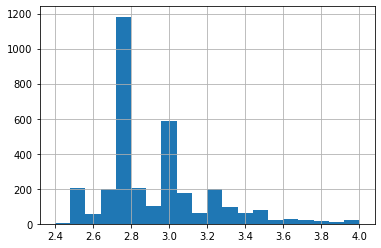

In [172]:
df_in_center['ceiling_height'].hist(bins=20)
plt.show()

Гистограмма Площади: Большая часть квартир имеет метраж от 40 до 100 кв.м., пиков много, основные - 45, 60, 70 и 90 кв.м.
Гистограмма Цены: цена на квартиры лежит, в основном, в промежутке от 4 до 10 млн р.Два явных пика в 6-7 млн. После 10млн виден спад количества почти в три раза.
Гистограмма Комнаты: Больше всего 2 и 3 комнатных квартир, чуть меньше - 1хкомнатных. 
ГистограммаВысота потолков: Большой пик в 2,7 метра, потом идут 3 метра. Теория о том что в центре много квартир с 3 и более метров потолками квартир не подтверждается.

#### <a name="4.7.2."></a> 4.7.2. Зависимость цены от этажа квартиры для центра Питера
<font>[к Оглавлению](#0.0)</font>

In [173]:
df_floor_name_center = round(df_in_center[['floor_name', 'last_price']].pivot_table(index='floor_name', values='last_price'))
df_floor_name_center

,last_price
floor_name,
другой,9467.0
первый,6891.0
последний,8832.0


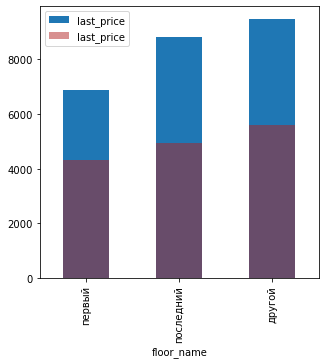

In [174]:
df_floor_piter_1 = df_floor_name_center.sort_values(by='last_price', ascending=True)
df_floor_name_1 = df_floor_name.sort_values(by='last_price', ascending=True)
ax = df_floor_piter_1.plot(kind='bar', y = 'last_price', figsize = (5, 5))
df_floor_name_1.plot(kind='bar', y = 'last_price', figsize = (5, 5), ax=ax, color='firebrick', alpha=0.5)
plt.show()

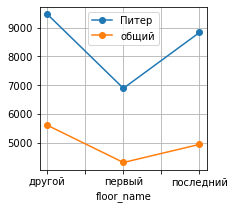

In [175]:
df_floor_piter = df_floor_name_center.pivot_table(index='floor_name', values='last_price').reset_index()

df_floor_obl = df_floor_name.pivot_table(index='floor_name', values='last_price').reset_index()
ax = df_floor_piter.plot(x='floor_name', y='last_price',style='o-', figsize=(3, 3), grid=True, label='Питер')
df_floor_obl.plot(x='floor_name', y='last_price',style='o-', figsize=(3, 3), grid=True, label='общий', ax=ax)
plt.show()

Показатели соотношения этажа по центру Питера не изменились ко всем квартирам. Первый этаж стал на 1% дешевле другого и составила 9%,а разница первого и посленего увеличилась с 4% до 6% 

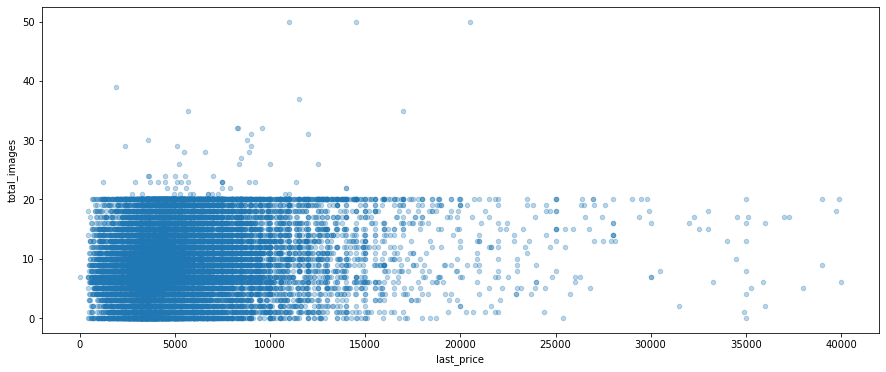

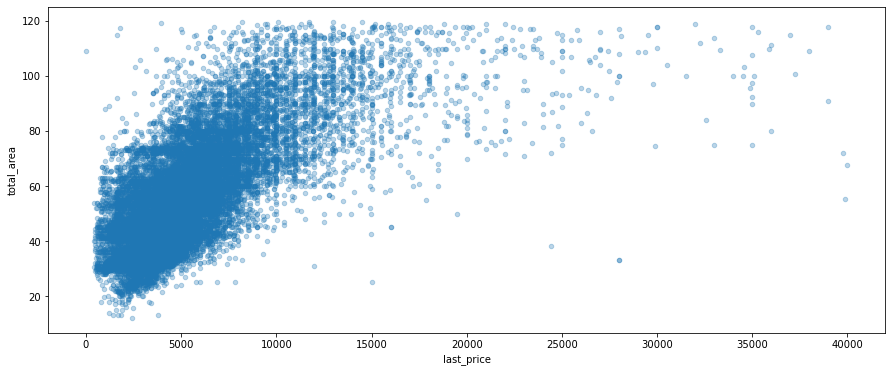

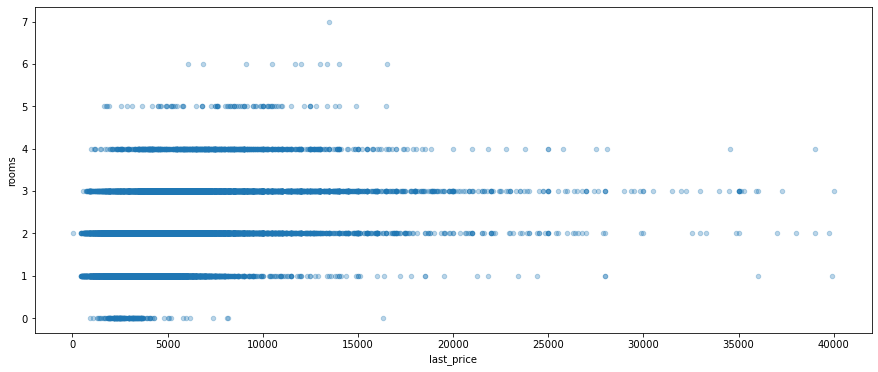

In [176]:
for column in ['total_images', 'total_area', 'rooms']:
    df.plot(x='last_price', y=column, kind='scatter', alpha=0.3, figsize = (15,6))

#### <a name="4.7.3."></a> 4.7.3. Зависимость цены от даты размещения квартиры для центра Питера
<font>[к Оглавлению](#0.0)</font>

In [177]:
df_in_center[['week_exp', 'month_exp', 'year_exp', 'last_price']].corr()

,month_exp,year_exp,last_price
month_exp,1.000000,-0.235230,-0.026501
year_exp,-0.235230,1.000000,-0.003575
last_price,-0.026501,-0.003575,1.000000


##### Средняя цена по дню недели

In [178]:
df_week_center = round(df_in_center[['week_exp', 'last_price']].pivot_table(index='week_exp', values='last_price'))
df_week_center.sort_values('week_exp')

,last_price
week_exp,
Friday,8911.0
Monday,9234.0
Saturday,8653.0
Sunday,9319.0
Thursday,9043.0
Tuesday,9042.0
Wednesday,9160.0


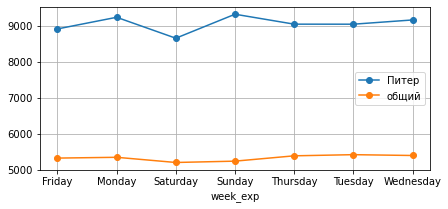

In [179]:
df_week_piter = df_week_center.pivot_table(index='week_exp', values='last_price').reset_index()
df_week_obl = df_week.pivot_table(index='week_exp', values='last_price').reset_index()
ax = df_week_piter.plot( x='week_exp', y='last_price',style='o-', figsize=(7, 3), grid=True, label='Питер')   
df_week_obl.plot( x='week_exp', y='last_price',style='o-', figsize=(7, 3), grid=True, label='общий', ax=ax)
plt.show()

Изменения по дням недели есть, но несильно выражены. Немного упали значения понедельника и подросли выходные

##### Средняя цена по месяцу

In [180]:
df_month_center = round(df_in_center[['month_exp', 'last_price']].pivot_table(index='month_exp', values='last_price'))
df_month_center.sort_values('month_exp')

,last_price
month_exp,
1,9197.0
2,9231.0
3,9240.0
4,9130.0
5,8457.0
6,9512.0
7,8735.0
8,9220.0
9,9191.0


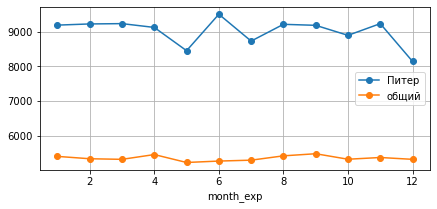

In [181]:
df_month_piter = df_month_center.pivot_table(index='month_exp', values='last_price').reset_index()
df_month_obl = df_month.pivot_table(index='month_exp', values='last_price').reset_index()
ax = df_month_piter.plot( x='month_exp', y='last_price',style='o-', figsize=(7, 3), grid=True, label='Питер')   
df_month_obl.plot( x='month_exp', y='last_price',style='o-', figsize=(7, 3), grid=True, label='общий', ax=ax)
plt.show()

Более выражены стали месяцы просадки - Май, Июль, Октябрь и Декабрь

##### Средняя цена по году

In [182]:
df_year_center = round(df_in_center[['year_exp', 'last_price']].pivot_table(index='year_exp', values='last_price'))
df_year_center.sort_values('year_exp')

,last_price
year_exp,
2014,11602.0
2015,9169.0
2016,9301.0
2017,8828.0
2018,8968.0
2019,9532.0


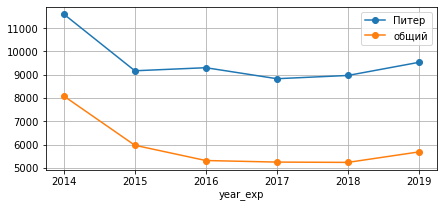

In [183]:
df_year_piter = df_year_center.pivot_table(index='year_exp', values='last_price').reset_index()
df_year_obl = df_year.pivot_table(index='year_exp', values='last_price').reset_index()
ax = df_year_piter.plot( x='year_exp', y='last_price',style='o-', figsize=(7, 3), grid=True, label='Питер')   
df_year_obl.plot( x='year_exp', y='last_price',style='o-', figsize=(7, 3), grid=True, label='общий', ax=ax)
plt.show()

Показатели по годам не изменились. Немного подрос 2016

### <a name="4.8."></a> 4.8. Матрица корреляции между величинами, который могут влиять на стоимость квартиры
<font>[к Оглавлению](#0.0)</font>

,last_price,total_area,living_area,kitchen_area,rooms,price_m2,floor
last_price,1.000000,0.720354,0.585700,0.544565,0.417601,0.722020,0.098352
total_area,0.720354,1.000000,0.907348,0.490348,0.790215,0.108227,-0.018800
living_area,0.585700,0.907348,1.000000,0.209846,0.866282,0.003538,-0.115743
kitchen_area,0.544565,0.490348,0.209846,1.000000,0.085059,0.315189,0.184937
rooms,0.417601,0.790215,0.866282,0.085059,1.000000,-0.115775,-0.163857
price_m2,0.722020,0.108227,0.003538,0.315189,-0.115775,1.000000,0.195316
floor,0.098352,-0.018800,-0.115743,0.184937,-0.163857,0.195316,1.000000


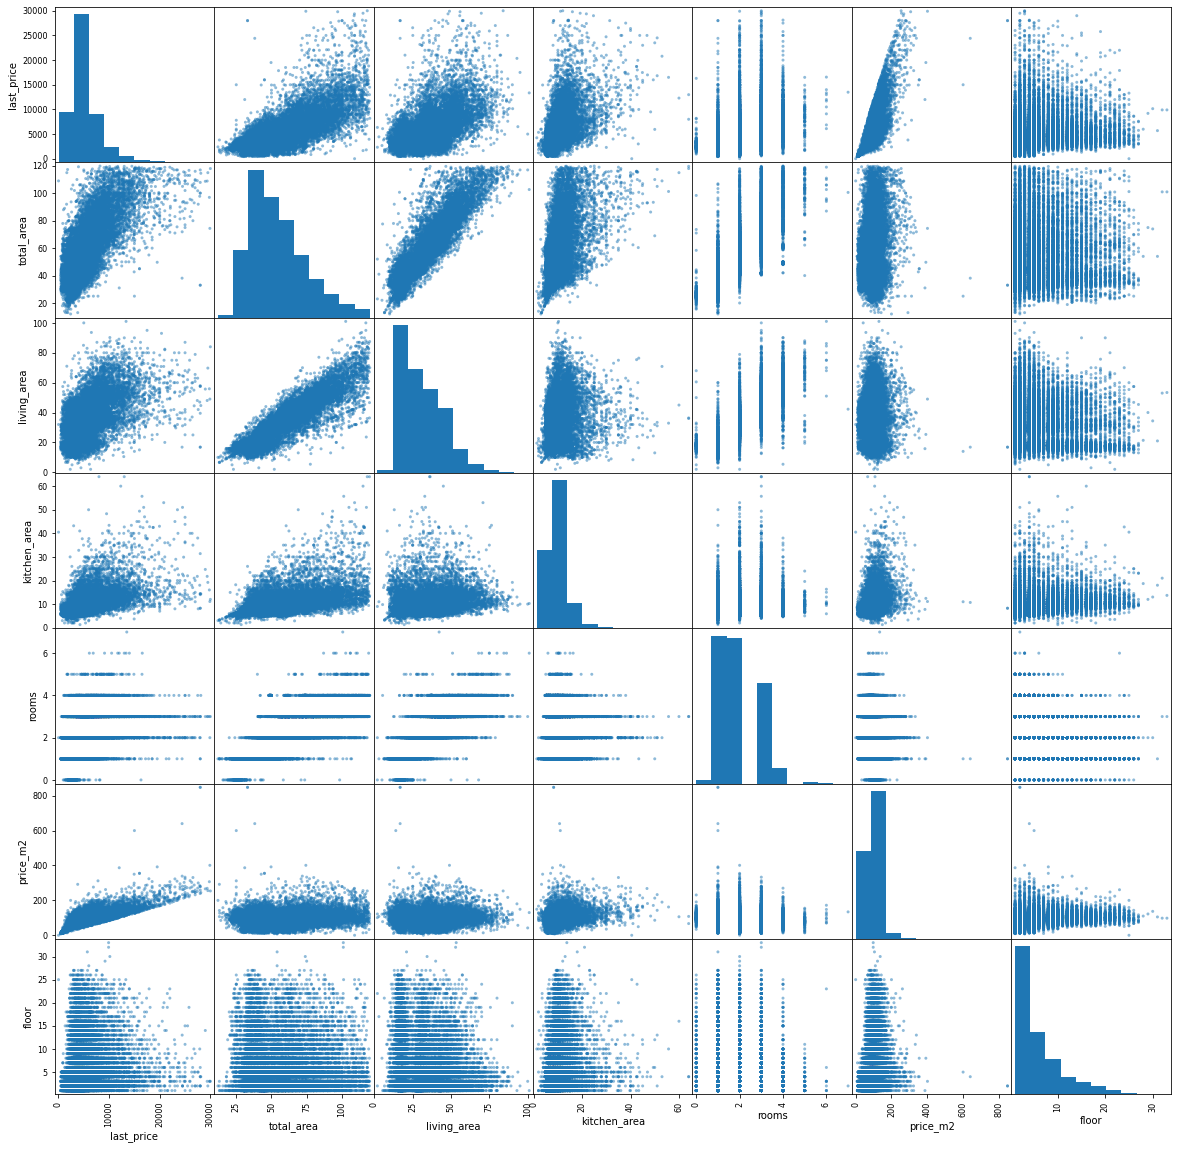

In [184]:
df_EAD_corr = (df_EAD.query('last_price < 30000')[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'price_m2', 'floor']])
display(df_EAD_corr.corr());
pd.plotting.scatter_matrix(df_EAD_corr, figsize=(20, 20))
plt.show()

In [188]:
df_EAD = df_EAD.fillna(0)

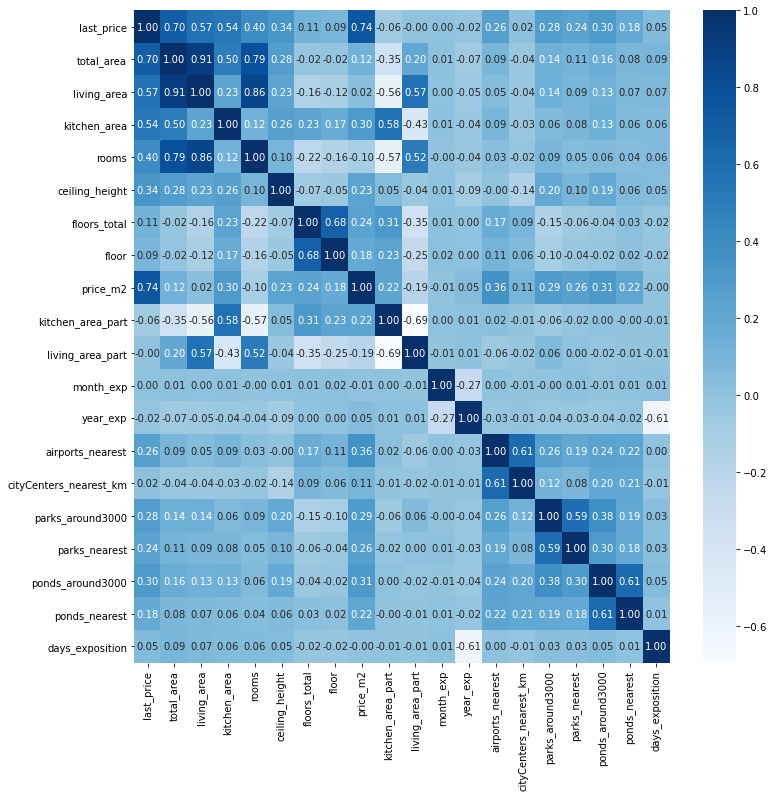

In [189]:
plt.figure(figsize=(12,12))
sns.heatmap(df_EAD.corr(), annot=True, cmap="Blues", fmt='.2f')
plt.show()

Самое большой коэффициент кореляции наблюдается в левом верхнем углу, там где площади, комнаты. Остальной "мир" не имеет влияния на цену, по нашим рассчетам, может конечно все намного сложнее. 

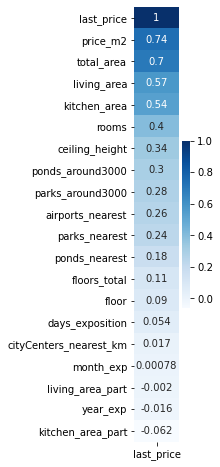

In [190]:
plt.figure(figsize=(1,8))
sns.heatmap(df_EAD.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Blues", annot=True)

Из полученной таблицы корреляции, сильнее всего цена на квартиру зависит от цены за квадратный метр, от общей площади квартиры (чем больше площадь, тем выше цена), от площади жилой площади и площади кухни, а после количества комнат зависимость очень падает.
Также небольшое влияние оказывает удаленность от центра - чем дальше от центра, тем ниже цена. Ожидаемо. А растояние до аэропорта не играет ни какой роли.
Большинство из этих параметров оказывают очень слабое влияние на стоимость. Но если взять по районам, то там цифры могут подрасти, наверное.

### <a name="5.0"></a> Шаг 5. Общий вывод
<font>[к Оглавлению](#0.0)</font>

Изучив проект обнаружилось, что простые предположения не всегда совпадают с данными на практике. Зависимость цены от площади подтвердилась полностью. Зависимость от этажа так же подтвердилась, правда ожидалась большая разность. Не очень впечатлили данные о зависимости цены от времени продажи. Ожидалось более сильное "гуляние" графиков. 
Работа интересная и сложная. Много разных гипотез можно вывести и много места для копания новых предположений. В жизни много других факторов, которые сильно оказывают влияние время продажи и цену квартиры. 
Предыдущая работа была посвящена продажам картир в Севастополе, что позволило более глубоко погрузиться в работу и понять новые закономерности. Так же опыт помог с целостной картиной, не пришлось изучать рынок. Очень много других факторов хотелось бы увидеть в данных и проанализировать. Не очень понял данные к пруду и парку, что они нам давали и как сильно влияли. Более интересные данные могли быть следующие: ремонт(мебель и состяние квартиры), отопление, лифт, транспортная доступность, перепланировка,  расстояние до остановки, школы, университета. Эти данные могут влиять на стоимость более, чем некоторые из приведенных в таблице.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод